<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/Simulation_1403_07_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [1]:
!pip install fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 65.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
root_path = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation'

In [4]:
total_file_link = []
for i in os.listdir(root_path) :
  total_file_link.append(root_path+f'/{i}')

In [5]:
pd.read_csv(total_file_link[2])

r/R  mean_delta_x  std_delta_x  mean_delta_y  std_delta_y  \
0   0.2001        0.0434       0.0026       -0.0126       0.0013   
1   0.2499       -0.0157       0.0019       -0.0235       0.0031   
2   0.2998       -0.0418       0.0016       -0.0514       0.0053   
3   0.3498       -0.0550       0.0016       -0.0961       0.0091   
4   0.3913       -0.0646       0.0024       -0.1332       0.0133   
5   0.4496       -0.1020       0.0026       -0.1704       0.0173   
6   0.4997       -0.1255       0.0030       -0.2004       0.0207   
7   0.5387       -0.1535       0.0028       -0.2193       0.0230   
8   0.5996       -0.1964       0.0031       -0.2466       0.0273   
9   0.6498       -0.2235       0.0031       -0.2726       0.0316   
10  0.6998       -0.2741       0.0030       -0.2945       0.0354   
11  0.7500       -0.3002       0.0029       -0.3091       0.0391   
12  0.8001       -0.3363       0.0029       -0.3486       0.0430   
13  0.8497       -0.3810       0.0031       -0.3719       0.0474   
14  0.9102       -0.4236       0.0032       -0.3486       0.0526   
15  0.9734       -0.3914       0.0037       -0.3834       0.0581   

    mean_delta_z  std_delta_z  
0        -0.0162       0.0040  
1        -0.0061       0.0079  
2        -0.0781       0.0130  
3        -0.1268       0.0216  
4        -0.1839       0.0303  
5        -0.3251       0.0405  
6        -0.4803       0.0503  
7        -0.6758       0.0569  
8        -0.9893       0.0678  
9        -1.3829       0.0783  
10       -1.7870       0.0876  
11       -2.2590       0.0965  
12       -2.7745       0.1069  
13       -3.3516       0.1185  
14       -4.1247       0.1339  
15       -4.8769       0.1475

In [14]:
total_alpha_content = [ i / 1000 for i in range( 1 , 10 ) ]
total_flat_content  = [ i for i in range(1 , 5  ) ]
total_location      = list(range( 8 , 16))

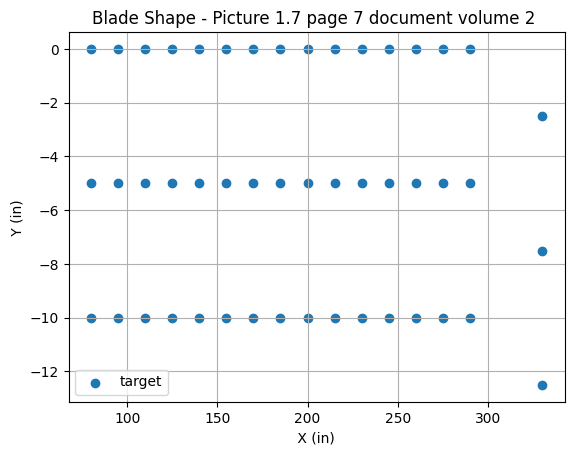

In [15]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [16]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,

    'accuracy_random_forest' : [] ,
    'n_estimators_RF' : [] ,
    'max_features_RF' : [] ,
    'max_depth_RF'    : [] ,
    'criterion_RF'    : [] ,

    'accuracy_extra_classifier' : [] ,
    'accuracy_svc_' : [] ,
    'C_svc'         : [] ,
    'kernel_svc'    : [] ,
    'gamma_svc'     : [] ,


}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


iter_alpha : 0.001 | iter_flat : 1 
Error in Simulation Health for Each Blade :  0.7973514436324465
Error in Simulation Health T  for Each Blade :  -1.1119091843054971
Error in Simulation Fault for Each Blade :  0.12677804901836276  --- MSE Fault S ----  0.054560433059004314
Error in Simulation Fault T  for Each Blade :  0.12677804901836276  --- Mean Squared Error Fault T :  8.960388732377371
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -1.7960307179225456
Error in Simulation Health T  for Each Blade :  0.7923381018571818
Error in Simulation Fault for Each Blade :  -1.0113770568886897  --- MSE Fault S ----  0.07896100316307635
Error in Simulation Fault T  for Each Blade :  -1.0113770568886897  --- Mean Squared Error Fault T :  8.51557888929049
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  0.37416784654500157
Error in Simulation Health T  for Each Blade :  1.0032303428872384
Error in Simulation Fault for Each B

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.2596 - loss: 1.4717 - val_acc: 0.3103 - val_loss: 1.4397
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2611 - loss: 1.4150 - val_acc: 0.3448 - val_loss: 1.4105
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2961 - loss: 1.4050 - val_acc: 0.3793 - val_loss: 1.3845
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2872 - loss: 1.3695 - val_acc: 0.3966 - val_loss: 1.3632
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3599 - loss: 1.3804 - val_acc: 0.3966 - val_loss: 1.3446
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3453 - loss: 1.3192 - val_acc: 0.4138 - val_loss: 1.3288
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3486 - loss: 1.3285 - val_acc: 0.4138 - val_loss: 1.3145
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3851 - loss: 1.3227 - val_acc: 0.3966 - val_loss: 1.3025
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3860 - loss: 1.3118 - val_acc: 0.4138 - 

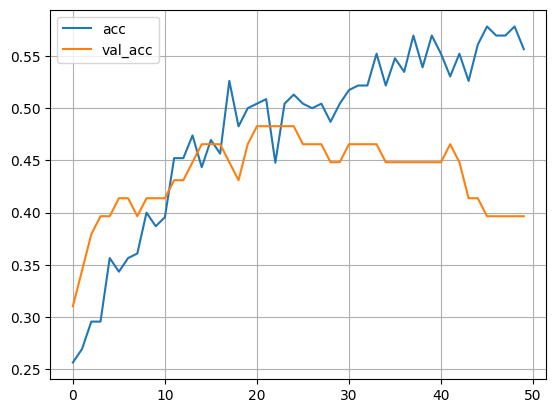

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4102 - loss: 0.9014
[0.9166486263275146, 0.3965517282485962]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 2 
Error in Simulation Health for Each Blade :  0.05075170395407458
Error in Simulation Health T  for Each Blade :  1.6359912961612322
Error in Simulation Fault for Each Blade :  -1.3894755924388114  --- MSE Fault S ----  0.06728752494181967
Error in Simulation Fault T  for Each Blade :  -1.3894755924388114  --- Mean Squared Error Fault T :  9.160919637011077
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -0.017748226534469946
Error in Simulation Health T  for Each Blade :  1.3228836603206426
Error in Simulation Fault for Each Blade :  0.9175643514862002  --- MSE Fault S ----  0.0844261779646206
Error in Simulation Fault T  for Each Blade :  0.9175643514862002  --- Mean Squared Error Fault T :  1.617702414486032
 ----- 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4827586206896552
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - acc: 0.1973 - loss: 1.4660 - val_acc: 0.1724 - val_loss: 1.4538
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2012 - loss: 1.4346 - val_acc: 0.1207 - val_loss: 1.4419
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2478 - loss: 1.4308 - val_acc: 0.1724 - val_loss: 1.4336
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.1900 - loss: 1.4127 - val_acc: 0.1897 - val_loss: 1.4267
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2146 - loss: 1.4036 - val_acc: 0.2241 - val_loss: 1.4208
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2512 - loss: 1.3823 - val_acc: 0.2241 - val_loss: 1.4150
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2288 - loss: 1.4181 - val_acc: 0.2414 - val_loss: 1.4089
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2927 - loss: 1.4039 - val_acc: 0.2414 - val_loss: 1.4019
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2675 - loss: 1.3937 - val_acc: 0.

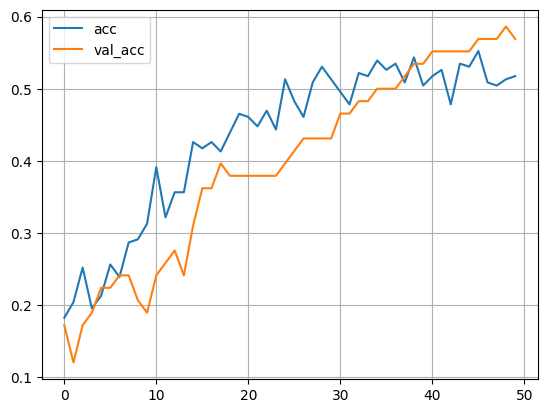

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5772 - loss: 0.9798 
[0.9812658429145813, 0.568965494632721]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 3 
Error in Simulation Health for Each Blade :  0.5530114568180715
Error in Simulation Health T  for Each Blade :  1.538813277811275
Error in Simulation Fault for Each Blade :  -2.006166029496539  --- MSE Fault S ----  0.21940459757492295
Error in Simulation Fault T  for Each Blade :  -2.006166029496539  --- Mean Squared Error Fault T :  7.968337730957995
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  1.652637545547627
Error in Simulation Health T  for Each Blade :  6.322546398212267
Error in Simulation Fault for Each Blade :  -0.964317701340131  --- MSE Fault S ----  0.07451110882134078
Error in Simulation Fault T  for Each Blade :  -0.964317701340131  --- Mean Squared Error Fault T :  4.283079500093527
 ----- for each 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4827586206896552
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.2551 - loss: 1.4609 - val_acc: 0.1724 - val_loss: 1.4224
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2473 - loss: 1.4365 - val_acc: 0.2069 - val_loss: 1.3925
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3463 - loss: 1.3861 - val_acc: 0.2586 - val_loss: 1.3686
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3571 - loss: 1.3615 - val_acc: 0.3621 - val_loss: 1.3490
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3512 - loss: 1.3608 - val_acc: 0.3793 - val_loss: 1.3286
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3443 - loss: 1.3315 - val_acc: 0.3966 - val_loss: 1.3116
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3753 - loss: 1.3233 - val_acc: 0.3966 - val_loss: 1.2911
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3808 - loss: 1.2941 - val_acc: 0.3966 - val_loss: 1.2695
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4196 - loss: 1.2822 - val_acc: 0.3966 - v

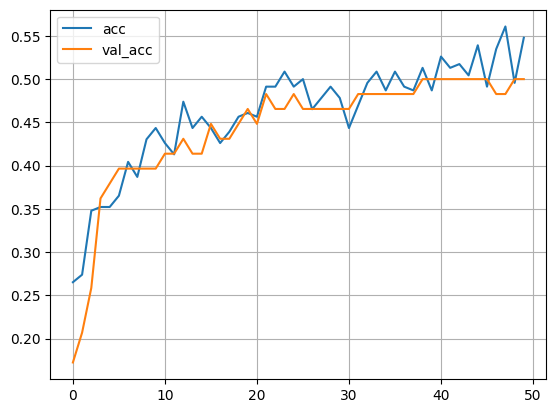

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5000 - loss: 0.8612 
[0.8697008490562439, 0.5]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 4 
Error in Simulation Health for Each Blade :  -1.0081551229074561
Error in Simulation Health T  for Each Blade :  3.8997435672149425
Error in Simulation Fault for Each Blade :  -1.2943027434631245  --- MSE Fault S ----  0.16699007585901762
Error in Simulation Fault T  for Each Blade :  -1.2943027434631245  --- Mean Squared Error Fault T :  9.81936440624539
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  0.8608804894582751
Error in Simulation Health T  for Each Blade :  3.6649749660195114
Error in Simulation Fault for Each Blade :  0.17297311648321845  --- MSE Fault S ----  0.0394773877253236
Error in Simulation Fault T  for Each Blade :  0.17297311648321845  --- Mean Squared Error Fault T :  8.278849582241014
 ----- for each Blade Si

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.43103448275862066
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - acc: 0.2760 - loss: 1.5280 - val_acc: 0.3448 - val_loss: 1.5732
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2794 - loss: 1.5147 - val_acc: 0.3448 - val_loss: 1.5198
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3471 - loss: 1.4025 - val_acc: 0.3793 - val_loss: 1.4802
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3077 - loss: 1.4034 - val_acc: 0.3793 - val_loss: 1.4446
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3793 - loss: 1.3489 - val_acc: 0.3793 - val_loss: 1.4143
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3899 - loss: 1.3263 - val_acc: 0.3966 - val_loss: 1.3884
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3267 - loss: 1.3683 - val_acc: 0.3966 - val_loss: 1.3635
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3686 - loss: 1.3211 - val_acc: 0.4138 - val_loss: 1.3388
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4204 - loss: 1.2509 - val_acc: 0.41

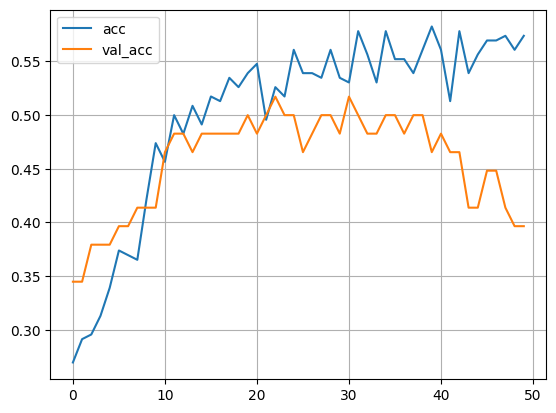

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.4415 - loss: 0.8907
[0.9424730539321899, 0.3965517282485962]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 1 
Error in Simulation Health for Each Blade :  0.7669277797275376
Error in Simulation Health T  for Each Blade :  1.157145184322797
Error in Simulation Fault for Each Blade :  -0.5630287803260792  --- MSE Fault S ----  0.10295847421893556
Error in Simulation Fault T  for Each Blade :  -0.5630287803260792  --- Mean Squared Error Fault T :  7.547170097437028
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  1.4221478962532093
Error in Simulation Health T  for Each Blade :  -0.4047169002344868
Error in Simulation Fault for Each Blade :  0.29294258814697893  --- MSE Fault S ----  0.07443103622459096
Error in Simulation Fault T  for Each Blade :  0.29294258814697893  --- Mean Squared Error Fault T :  9.921271561518543
 ----- f

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.46551724137931033
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.2616 - loss: 1.4327 - val_acc: 0.2931 - val_loss: 1.4223
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3397 - loss: 1.3708 - val_acc: 0.3448 - val_loss: 1.3973
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3358 - loss: 1.3651 - val_acc: 0.3448 - val_loss: 1.3729
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3377 - loss: 1.3735 - val_acc: 0.3621 - val_loss: 1.3482
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3782 - loss: 1.3065 - val_acc: 0.3793 - val_loss: 1.3250
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3987 - loss: 1.2890 - val_acc: 0.3966 - val_loss: 1.3011
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4440 - loss: 1.2611 - val_acc: 0.4138 - val_loss: 1.2805
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4030 - loss: 1.2523 - val_acc: 0.4138 - val_loss: 1.2617
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4583 - loss: 1.2225 - val_acc: 0.3966 - 

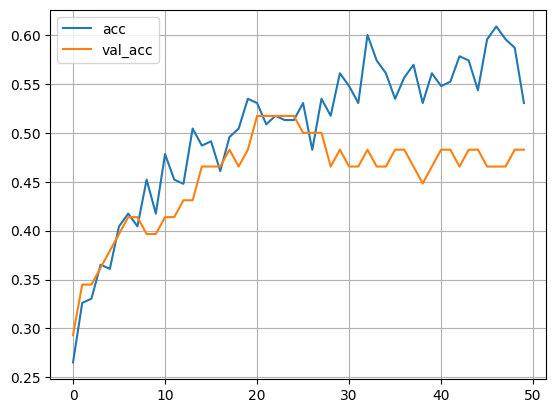

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4781 - loss: 0.8669 
[0.8703330755233765, 0.48275861144065857]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 2 
Error in Simulation Health for Each Blade :  -0.6786134485265858
Error in Simulation Health T  for Each Blade :  2.5448789688856257
Error in Simulation Fault for Each Blade :  -1.3718239707553206  --- MSE Fault S ----  0.19117291587778107
Error in Simulation Fault T  for Each Blade :  -1.3718239707553206  --- Mean Squared Error Fault T :  10.595270779446746
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -0.5656744949762627
Error in Simulation Health T  for Each Blade :  1.7462014584043208
Error in Simulation Fault for Each Blade :  1.1872463061092073  --- MSE Fault S ----  0.04755374665205515
Error in Simulation Fault T  for Each Blade :  1.1872463061092073  --- Mean Squared Error Fault T :  8.347588310389215
 -----

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.41379310344827586
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.3116 - loss: 1.4161 - val_acc: 0.4483 - val_loss: 1.2624
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3405 - loss: 1.3684 - val_acc: 0.4483 - val_loss: 1.2437
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3786 - loss: 1.3036 - val_acc: 0.4655 - val_loss: 1.2298
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3538 - loss: 1.3192 - val_acc: 0.5000 - val_loss: 1.2162
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3355 - loss: 1.3137 - val_acc: 0.4655 - val_loss: 1.2028
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4368 - loss: 1.2407 - val_acc: 0.4655 - val_loss: 1.1883
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4418 - loss: 1.2228 - val_acc: 0.5000 - val_loss: 1.1732
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4751 - loss: 1.2110 - val_acc: 0.4828 - val_loss: 1.1595
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4301 - loss: 1.2307 - val_acc: 0.4828 -

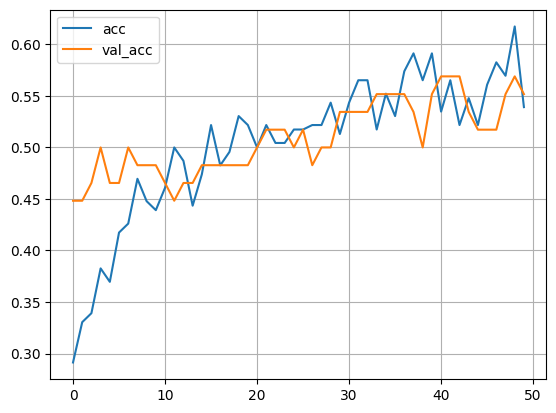

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.5761 - loss: 0.8363
[0.8508289456367493, 0.5517241358757019]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 3 
Error in Simulation Health for Each Blade :  -0.37157037384563885
Error in Simulation Health T  for Each Blade :  3.121101344288782
Error in Simulation Fault for Each Blade :  -0.21390851775844522  --- MSE Fault S ----  0.0798547446657332
Error in Simulation Fault T  for Each Blade :  -0.21390851775844522  --- Mean Squared Error Fault T :  5.778242477717336
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -1.2912174853811027
Error in Simulation Health T  for Each Blade :  3.128302067330897
Error in Simulation Fault for Each Blade :  -1.2459669663303978  --- MSE Fault S ----  0.18505646133056128
Error in Simulation Fault T  for Each Blade :  -1.2459669663303978  --- Mean Squared Error Fault T :  12.869363913647009
 ----

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.2516 - loss: 1.4473 - val_acc: 0.2931 - val_loss: 1.4712
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3057 - loss: 1.4002 - val_acc: 0.2931 - val_loss: 1.4382
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2774 - loss: 1.3812 - val_acc: 0.2241 - val_loss: 1.4075
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3466 - loss: 1.3241 - val_acc: 0.2241 - val_loss: 1.3863
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3426 - loss: 1.3238 - val_acc: 0.2586 - val_loss: 1.3688
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3466 - loss: 1.3287 - val_acc: 0.2241 - val_loss: 1.3537
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3871 - loss: 1.2917 - val_acc: 0.2241 - val_loss: 1.3388
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4446 - loss: 1.2361 - val_acc: 0.2414 - val_loss: 1.3190
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4006 - loss: 1.2488 - val_acc: 0.2586 -

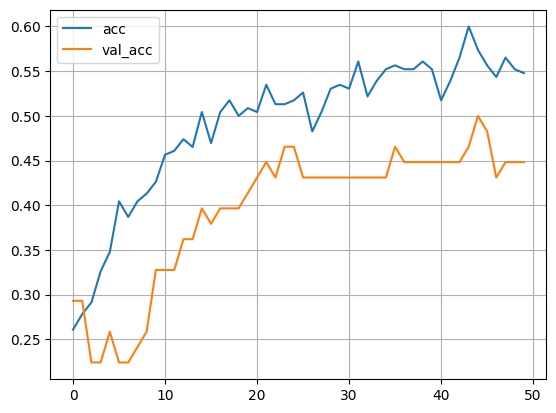

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4551 - loss: 0.8694 
[0.8889022469520569, 0.4482758641242981]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 4 
Error in Simulation Health for Each Blade :  -3.4949630541622794
Error in Simulation Health T  for Each Blade :  3.0077479493677
Error in Simulation Fault for Each Blade :  0.13102920406691343  --- MSE Fault S ----  0.02593201542927126
Error in Simulation Fault T  for Each Blade :  0.13102920406691343  --- Mean Squared Error Fault T :  5.508936957919676
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  1.8568522539013568
Error in Simulation Health T  for Each Blade :  2.353359663729664
Error in Simulation Fault for Each Blade :  0.19441032732730412  --- MSE Fault S ----  0.02200676521780993
Error in Simulation Fault T  for Each Blade :  0.19441032732730412  --- Mean Squared Error Fault T :  2.5308717627415382
 ----- for

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.46551724137931033
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.2733 - loss: 1.4609 - val_acc: 0.2586 - val_loss: 1.4241
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2313 - loss: 1.4759 - val_acc: 0.2759 - val_loss: 1.3852
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3190 - loss: 1.4133 - val_acc: 0.2931 - val_loss: 1.3569
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3570 - loss: 1.3981 - val_acc: 0.3103 - val_loss: 1.3330
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3336 - loss: 1.3639 - val_acc: 0.3793 - val_loss: 1.3153
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3633 - loss: 1.3299 - val_acc: 0.3966 - val_loss: 1.2942
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3650 - loss: 1.3225 - val_acc: 0.3966 - val_loss: 1.2747
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4112 - loss: 1.2622 - val_acc: 0.4310 - val_loss: 1.2587
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4345 - loss: 1.2597 - val_acc: 0.4310 - 

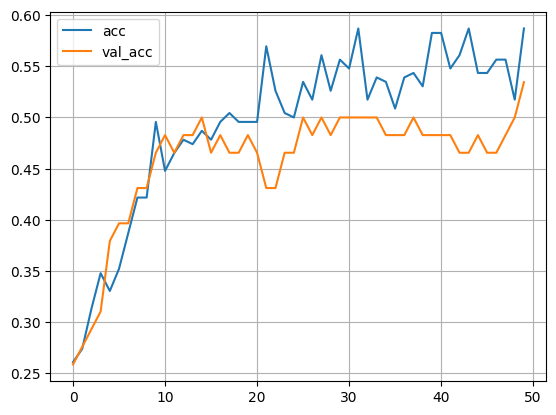

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5230 - loss: 0.8569 
[0.856961190700531, 0.5344827771186829]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 1 
Error in Simulation Health for Each Blade :  -0.1221264867734162
Error in Simulation Health T  for Each Blade :  1.8800390022793678
Error in Simulation Fault for Each Blade :  -0.6997293405927618  --- MSE Fault S ----  0.014238187880908505
Error in Simulation Fault T  for Each Blade :  -0.6997293405927618  --- Mean Squared Error Fault T :  2.14476736369163
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -1.727976329022568
Error in Simulation Health T  for Each Blade :  1.9973004118752513
Error in Simulation Fault for Each Blade :  1.4023652135374087  --- MSE Fault S ----  0.09128260476420734
Error in Simulation Fault T  for Each Blade :  1.4023652135374087  --- Mean Squared Error Fault T :  6.525312562407909
 ----- for

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5689655172413793
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - acc: 0.2681 - loss: 1.4567 - val_acc: 0.1897 - val_loss: 1.4328
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2432 - loss: 1.4363 - val_acc: 0.2241 - val_loss: 1.4066
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2745 - loss: 1.4150 - val_acc: 0.2931 - val_loss: 1.3864
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2759 - loss: 1.3741 - val_acc: 0.2931 - val_loss: 1.3707
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3505 - loss: 1.3633 - val_acc: 0.3103 - val_loss: 1.3559
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2989 - loss: 1.3550 - val_acc: 0.3448 - val_loss: 1.3445
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3688 - loss: 1.3296 - val_acc: 0.3621 - val_loss: 1.3318
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3683 - loss: 1.3207 - val_acc: 0.3966 - val_loss: 1.3184
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3994 - loss: 1.3030 - val_acc: 0.

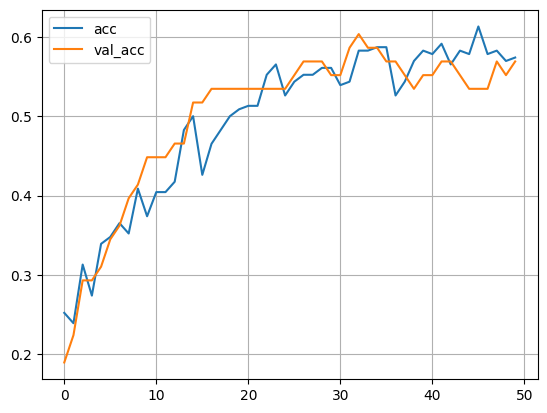

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.5668 - loss: 0.8344
[0.8347275257110596, 0.568965494632721]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 2 
Error in Simulation Health for Each Blade :  1.0882827262173804
Error in Simulation Health T  for Each Blade :  0.7258689463339887
Error in Simulation Fault for Each Blade :  1.7962979270608184  --- MSE Fault S ----  0.1262968792897993
Error in Simulation Fault T  for Each Blade :  1.7962979270608184  --- Mean Squared Error Fault T :  8.953623180294032
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  1.8721451851111803
Error in Simulation Health T  for Each Blade :  2.5647722748788664
Error in Simulation Fault for Each Blade :  -0.6261271228094407  --- MSE Fault S ----  0.04221415355544738
Error in Simulation Fault T  for Each Blade :  -0.6261271228094407  --- Mean Squared Error Fault T :  10.30238786622972
 ----- for e

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

accuracy accuracy_random_forest  : 0.5
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - acc: 0.2984 - loss: 1.4023 - val_acc: 0.3448 - val_loss: 1.3635
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2733 - loss: 1.3999 - val_acc: 0.3621 - val_loss: 1.3469
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3027 - loss: 1.3664 - val_acc: 0.3621 - val_loss: 1.3334
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3354 - loss: 1.3410 - val_acc: 0.3448 - val_loss: 1.3227
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3167 - loss: 1.3184 - val_acc: 0.3621 - val_loss: 1.3109
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3706 - loss: 1.3003 - val_acc: 0.4138 - val_loss: 1.2989
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.3825 - loss: 1.2967 - val_acc: 0.3966 - val_loss: 1.2885
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4024 - loss: 1.2716 - val_acc: 0.3966 - val_loss: 1.2785
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4347 - loss: 1.2635 - val_acc: 0.

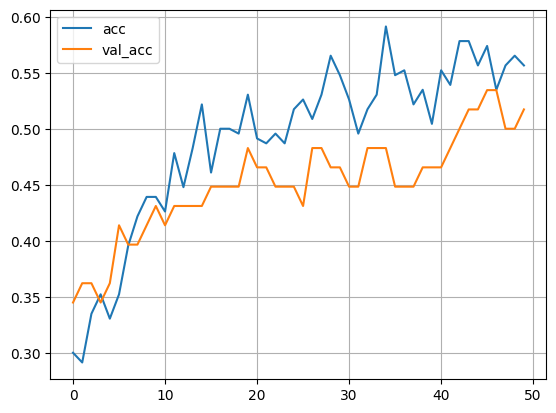

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.5115 - loss: 0.8667
[0.8795871734619141, 0.517241358757019]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 3 
Error in Simulation Health for Each Blade :  -0.44684256832738467
Error in Simulation Health T  for Each Blade :  0.7431867975932582
Error in Simulation Fault for Each Blade :  -3.7664547147062977  --- MSE Fault S ----  0.292368877431382
Error in Simulation Fault T  for Each Blade :  -3.7664547147062977  --- Mean Squared Error Fault T :  7.982795239992677
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  2.164611167140854
Error in Simulation Health T  for Each Blade :  2.43884709887426
Error in Simulation Fault for Each Blade :  -0.6101220355989696  --- MSE Fault S ----  0.10795405438378518
Error in Simulation Fault T  for Each Blade :  -0.6101220355989696  --- Mean Squared Error Fault T :  5.853291131374447
 ----- for e

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3793103448275862
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - acc: 0.2283 - loss: 1.4998 - val_acc: 0.2414 - val_loss: 1.4021
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2475 - loss: 1.4386 - val_acc: 0.2414 - val_loss: 1.3716
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2445 - loss: 1.3950 - val_acc: 0.2414 - val_loss: 1.3450
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2846 - loss: 1.4215 - val_acc: 0.2586 - val_loss: 1.3194
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3106 - loss: 1.3341 - val_acc: 0.3103 - val_loss: 1.2971
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2955 - loss: 1.3444 - val_acc: 0.3448 - val_loss: 1.2782
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3802 - loss: 1.2901 - val_acc: 0.3793 - val_loss: 1.2604
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3620 - loss: 1.2717 - val_acc: 0.4138 - val_loss: 1.2435
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3838 - loss: 1.2400 - val_acc: 0.4138 - v

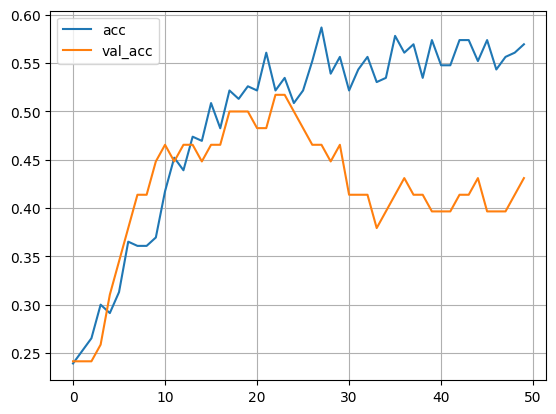

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4228 - loss: 0.8774 
[0.8768470287322998, 0.43103447556495667]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 4 
Error in Simulation Health for Each Blade :  0.5348308343012818
Error in Simulation Health T  for Each Blade :  4.579718271339473
Error in Simulation Fault for Each Blade :  -0.4207180822989991  --- MSE Fault S ----  0.1174707512412103
Error in Simulation Fault T  for Each Blade :  -0.4207180822989991  --- Mean Squared Error Fault T :  4.9104705286587444
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  1.0845524475096568
Error in Simulation Health T  for Each Blade :  2.749007793856701
Error in Simulation Fault for Each Blade :  0.5800351086408801  --- MSE Fault S ----  0.09337564620404422
Error in Simulation Fault T  for Each Blade :  0.5800351086408801  --- Mean Squared Error Fault T :  5.930167377782522
 ----- for 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3620689655172414
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - acc: 0.2339 - loss: 1.4588 - val_acc: 0.2759 - val_loss: 1.4136
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2597 - loss: 1.4370 - val_acc: 0.2931 - val_loss: 1.3873
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2516 - loss: 1.4116 - val_acc: 0.3103 - val_loss: 1.3627
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.2991 - loss: 1.3818 - val_acc: 0.3103 - val_loss: 1.3430
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3110 - loss: 1.3612 - val_acc: 0.3793 - val_loss: 1.3279
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3359 - loss: 1.3566 - val_acc: 0.3793 - val_loss: 1.3143
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3526 - loss: 1.3254 - val_acc: 0.4483 - val_loss: 1.3015
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3725 - loss: 1.3272 - val_acc: 0.4483 - val_loss: 1.2876
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3851 - loss: 1.3256 - val_acc: 0.4483

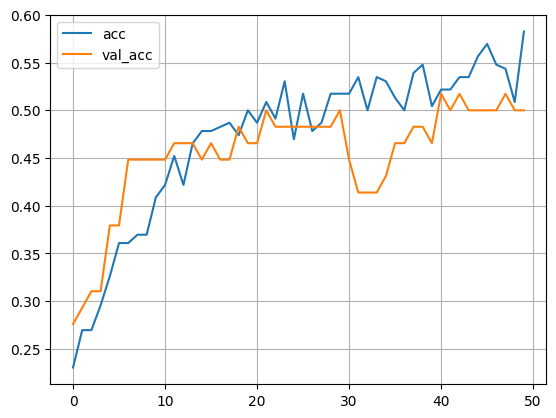

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.5208 - loss: 0.8643
[0.8845449090003967, 0.5]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 1 
Error in Simulation Health for Each Blade :  -0.09841419656202
Error in Simulation Health T  for Each Blade :  -1.8636678655882286
Error in Simulation Fault for Each Blade :  0.03170283561463827  --- MSE Fault S ----  0.1306041839898016
Error in Simulation Fault T  for Each Blade :  0.03170283561463827  --- Mean Squared Error Fault T :  6.306963866428744
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -1.589091955779917
Error in Simulation Health T  for Each Blade :  0.5917510556695946
Error in Simulation Fault for Each Blade :  1.4069850269288122  --- MSE Fault S ----  0.052992306673996646
Error in Simulation Fault T  for Each Blade :  1.4069850269288122  --- Mean Squared Error Fault T :  13.287197267147524
 ----- for each Blade Si

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.41379310344827586
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.3136 - loss: 1.3742 - val_acc: 0.3793 - val_loss: 1.3436
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3328 - loss: 1.3474 - val_acc: 0.3621 - val_loss: 1.3247
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3789 - loss: 1.3330 - val_acc: 0.3793 - val_loss: 1.3058
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3822 - loss: 1.3056 - val_acc: 0.4310 - val_loss: 1.2894
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3673 - loss: 1.3225 - val_acc: 0.3966 - val_loss: 1.2713
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4216 - loss: 1.2569 - val_acc: 0.3966 - val_loss: 1.2537
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3635 - loss: 1.2865 - val_acc: 0.4310 - val_loss: 1.2407
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3600 - loss: 1.2657 - val_acc: 0.4483 - val_loss: 1.2284
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4110 - loss: 1.2265 - val_acc: 0.431

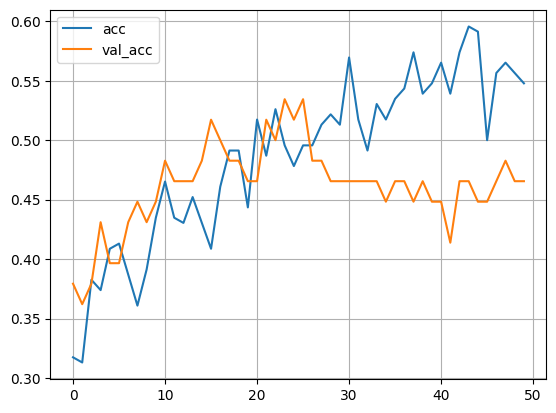

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4770 - loss: 0.8925 
[0.8946632742881775, 0.4655172526836395]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 2 
Error in Simulation Health for Each Blade :  -2.381436184581176
Error in Simulation Health T  for Each Blade :  1.6264189077935374
Error in Simulation Fault for Each Blade :  0.5064347201224784  --- MSE Fault S ----  0.031012322742539858
Error in Simulation Fault T  for Each Blade :  0.5064347201224784  --- Mean Squared Error Fault T :  7.679148070936015
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -0.5053149793369798
Error in Simulation Health T  for Each Blade :  2.276350648759603
Error in Simulation Fault for Each Blade :  -0.7022036396204365  --- MSE Fault S ----  0.02113305151419888
Error in Simulation Fault T  for Each Blade :  -0.7022036396204365  --- Mean Squared Error Fault T :  2.359246721193375
 ----- fo

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4827586206896552
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.2901 - loss: 1.4585 - val_acc: 0.2241 - val_loss: 1.4419
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2087 - loss: 1.4611 - val_acc: 0.2414 - val_loss: 1.4135
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2932 - loss: 1.3978 - val_acc: 0.2414 - val_loss: 1.3928
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3243 - loss: 1.3331 - val_acc: 0.2586 - val_loss: 1.3753
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3136 - loss: 1.3617 - val_acc: 0.2759 - val_loss: 1.3611
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3559 - loss: 1.3077 - val_acc: 0.2931 - val_loss: 1.3477
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4170 - loss: 1.3025 - val_acc: 0.3276 - val_loss: 1.3348
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4625 - loss: 1.2874 - val_acc: 0.3276 - val_loss: 1.3212
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4592 - loss: 1.2650 - val_acc: 0.3793

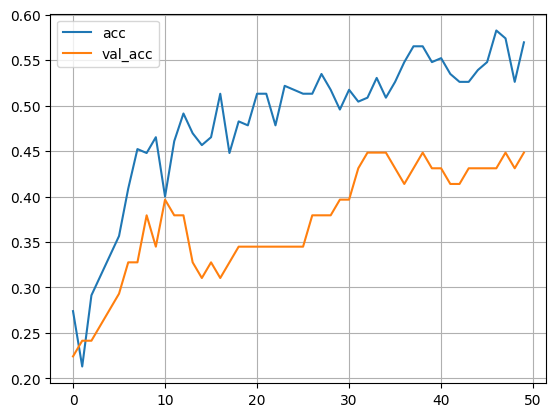

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4759 - loss: 0.9683 
[0.9783113598823547, 0.4482758641242981]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 3 
Error in Simulation Health for Each Blade :  -0.582706939145444
Error in Simulation Health T  for Each Blade :  4.722854402373633
Error in Simulation Fault for Each Blade :  -1.1181213883338557  --- MSE Fault S ----  0.07923495314964955
Error in Simulation Fault T  for Each Blade :  -1.1181213883338557  --- Mean Squared Error Fault T :  6.974440789088553
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -0.688756156084243
Error in Simulation Health T  for Each Blade :  4.245387674965933
Error in Simulation Fault for Each Blade :  -0.2928312923857541  --- MSE Fault S ----  0.0849969915755016
Error in Simulation Fault T  for Each Blade :  -0.2928312923857541  --- Mean Squared Error Fault T :  9.969521087186695
 ----- for 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4827586206896552
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.2250 - loss: 1.4580 - val_acc: 0.2069 - val_loss: 1.4584
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2600 - loss: 1.4494 - val_acc: 0.2414 - val_loss: 1.4463
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3045 - loss: 1.3807 - val_acc: 0.2241 - val_loss: 1.4365
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3027 - loss: 1.3900 - val_acc: 0.2241 - val_loss: 1.4271
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2979 - loss: 1.3825 - val_acc: 0.1897 - val_loss: 1.4158
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3252 - loss: 1.3602 - val_acc: 0.1897 - val_loss: 1.4075
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3617 - loss: 1.3491 - val_acc: 0.2241 - val_loss: 1.3972
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3170 - loss: 1.3583 - val_acc: 0.2241 - val_loss: 1.3880
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3727 - loss: 1.3310 - val_acc: 0.2414

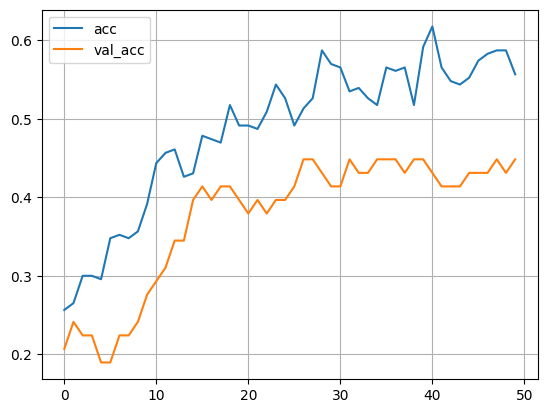

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4759 - loss: 0.9010
[0.9170889258384705, 0.4482758641242981]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 4 
Error in Simulation Health for Each Blade :  0.2912552491208167
Error in Simulation Health T  for Each Blade :  3.9410368533309352
Error in Simulation Fault for Each Blade :  -1.1787699866556605  --- MSE Fault S ----  0.11708802822404933
Error in Simulation Fault T  for Each Blade :  -1.1787699866556605  --- Mean Squared Error Fault T :  10.296948525861977
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -0.3836292162381001
Error in Simulation Health T  for Each Blade :  6.167087689965986
Error in Simulation Fault for Each Blade :  0.6131912817069416  --- MSE Fault S ----  0.05182414336586738
Error in Simulation Fault T  for Each Blade :  0.6131912817069416  --- Mean Squared Error Fault T :  3.557412407307488
 ----- fo

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.41379310344827586
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.3051 - loss: 1.4178 - val_acc: 0.2931 - val_loss: 1.3932
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2891 - loss: 1.4239 - val_acc: 0.3103 - val_loss: 1.3780
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3213 - loss: 1.3928 - val_acc: 0.3448 - val_loss: 1.3652
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3108 - loss: 1.4040 - val_acc: 0.3621 - val_loss: 1.3535
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3307 - loss: 1.3808 - val_acc: 0.3793 - val_loss: 1.3427
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3406 - loss: 1.3643 - val_acc: 0.3621 - val_loss: 1.3346
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3905 - loss: 1.3347 - val_acc: 0.3621 - val_loss: 1.3275
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3322 - loss: 1.3808 - val_acc: 0.3793 - val_loss: 1.3182
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4256 - loss: 1.3239 - val_acc: 0.3621

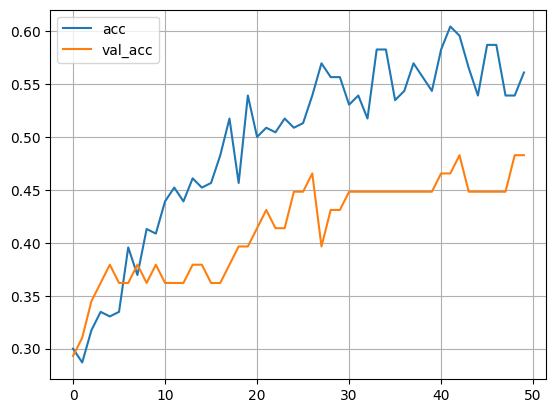

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4989 - loss: 0.9159 
[0.9350372552871704, 0.48275861144065857]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 1 
Error in Simulation Health for Each Blade :  -0.3613914969433878
Error in Simulation Health T  for Each Blade :  3.50819715662532
Error in Simulation Fault for Each Blade :  -0.22719547509030225  --- MSE Fault S ----  0.08434075824503302
Error in Simulation Fault T  for Each Blade :  -0.22719547509030225  --- Mean Squared Error Fault T :  7.257167248124843
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -1.8060303002768738
Error in Simulation Health T  for Each Blade :  1.2154094382986962
Error in Simulation Fault for Each Blade :  -3.6600633270309295  --- MSE Fault S ----  0.4492975481274764
Error in Simulation Fault T  for Each Blade :  -3.6600633270309295  --- Mean Squared Error Fault T :  18.856380195375344
 ----

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.46551724137931033
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - acc: 0.2002 - loss: 1.5089 - val_acc: 0.2069 - val_loss: 1.5235
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.1564 - loss: 1.5575 - val_acc: 0.2414 - val_loss: 1.4859
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2375 - loss: 1.4599 - val_acc: 0.1897 - val_loss: 1.4547
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2570 - loss: 1.4521 - val_acc: 0.2069 - val_loss: 1.4264
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2758 - loss: 1.4389 - val_acc: 0.2414 - val_loss: 1.4012
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2854 - loss: 1.3918 - val_acc: 0.3103 - val_loss: 1.3773
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2624 - loss: 1.3719 - val_acc: 0.3276 - val_loss: 1.3540
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3075 - loss: 1.3533 - val_acc: 0.3966 - val_loss: 1.3316
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3414 - loss: 1.3201 - val_acc: 0.3966 

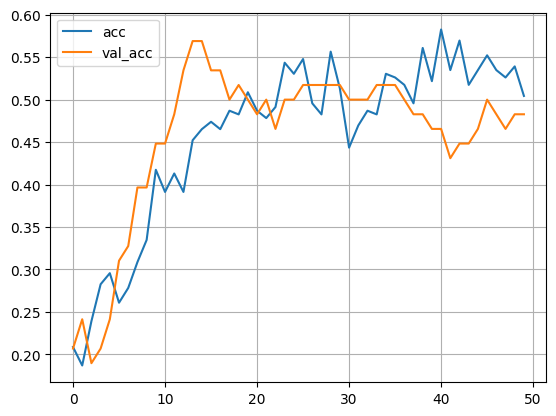

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4989 - loss: 0.8346 
[0.8494945764541626, 0.48275861144065857]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 2 
Error in Simulation Health for Each Blade :  0.48481047437011693
Error in Simulation Health T  for Each Blade :  2.849798207777623
Error in Simulation Fault for Each Blade :  1.7110420445828054  --- MSE Fault S ----  0.1412098646691182
Error in Simulation Fault T  for Each Blade :  1.7110420445828054  --- Mean Squared Error Fault T :  2.9974218072105425
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -0.26573558886144877
Error in Simulation Health T  for Each Blade :  2.243837033785535
Error in Simulation Fault for Each Blade :  -1.3993237423625118  --- MSE Fault S ----  0.120682362770329
Error in Simulation Fault T  for Each Blade :  -1.3993237423625118  --- Mean Squared Error Fault T :  9.77857364866613
 ----- for 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4827586206896552
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.2894 - loss: 1.4556 - val_acc: 0.2586 - val_loss: 1.4951
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2165 - loss: 1.4759 - val_acc: 0.1724 - val_loss: 1.4632
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2887 - loss: 1.3955 - val_acc: 0.1724 - val_loss: 1.4437
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2400 - loss: 1.3906 - val_acc: 0.2069 - val_loss: 1.4288
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2589 - loss: 1.3897 - val_acc: 0.1897 - val_loss: 1.4174
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2310 - loss: 1.4157 - val_acc: 0.1897 - val_loss: 1.4066
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2885 - loss: 1.3584 - val_acc: 0.2414 - val_loss: 1.3981
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2775 - loss: 1.3744 - val_acc: 0.2586 - val_loss: 1.3913
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2422 - loss: 1.3544 - val_acc: 0.2759

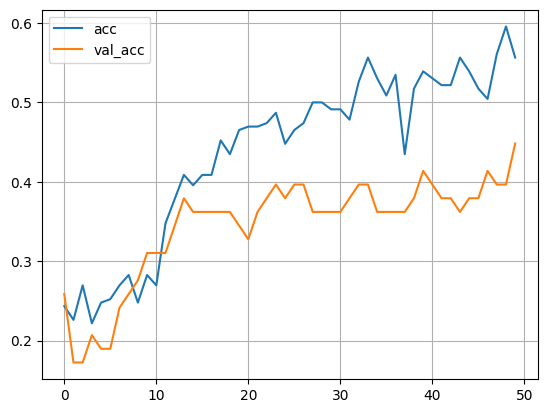

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4968 - loss: 0.9671
[0.971608579158783, 0.4482758641242981]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 3 
Error in Simulation Health for Each Blade :  -1.4411492515623823
Error in Simulation Health T  for Each Blade :  5.461976877143095
Error in Simulation Fault for Each Blade :  1.972326236574311  --- MSE Fault S ----  0.1476861325354509
Error in Simulation Fault T  for Each Blade :  1.972326236574311  --- Mean Squared Error Fault T :  13.990850658310341
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  0.4524791458988284
Error in Simulation Health T  for Each Blade :  2.9693066800082466
Error in Simulation Fault for Each Blade :  -0.13125201979918  --- MSE Fault S ----  0.0871982121498805
Error in Simulation Fault T  for Each Blade :  -0.13125201979918  --- Mean Squared Error Fault T :  4.682378282557857
 ----- for each Bl

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4482758620689655
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - acc: 0.1877 - loss: 1.4910 - val_acc: 0.2069 - val_loss: 1.4787
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.1758 - loss: 1.4962 - val_acc: 0.2069 - val_loss: 1.4632
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.1871 - loss: 1.4367 - val_acc: 0.2069 - val_loss: 1.4532
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2042 - loss: 1.4365 - val_acc: 0.2069 - val_loss: 1.4450
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2353 - loss: 1.4059 - val_acc: 0.2241 - val_loss: 1.4358
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2749 - loss: 1.3897 - val_acc: 0.2241 - val_loss: 1.4265
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2602 - loss: 1.3780 - val_acc: 0.2241 - val_loss: 1.4179
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2759 - loss: 1.3598 - val_acc: 0.2241 - val_loss: 1.4124
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2954 - loss: 1.3463 - val_acc: 0.2241 -

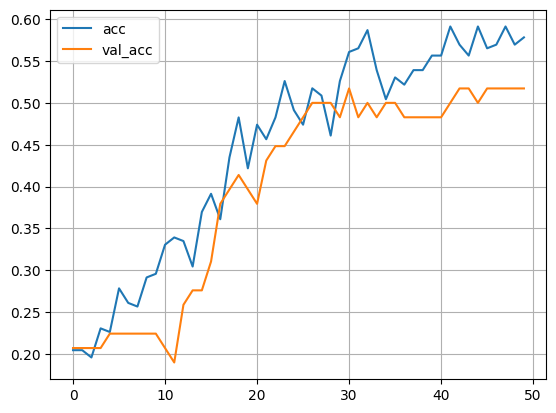

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5115 - loss: 0.8901 
[0.9131765961647034, 0.517241358757019]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 4 
Error in Simulation Health for Each Blade :  -0.12600045280176686
Error in Simulation Health T  for Each Blade :  2.5584259484252287
Error in Simulation Fault for Each Blade :  1.792989556803057  --- MSE Fault S ----  0.06739887836498369
Error in Simulation Fault T  for Each Blade :  1.792989556803057  --- Mean Squared Error Fault T :  4.521259757280409
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  0.9902878344561727
Error in Simulation Health T  for Each Blade :  2.0248930600446426
Error in Simulation Fault for Each Blade :  0.03637554094290918  --- MSE Fault S ----  0.04071093510027556
Error in Simulation Fault T  for Each Blade :  0.03637554094290918  --- Mean Squared Error Fault T :  6.576211101459389
 ----- for 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.39655172413793105
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - acc: 0.2135 - loss: 1.4558 - val_acc: 0.2931 - val_loss: 1.3790
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.2768 - loss: 1.4399 - val_acc: 0.3103 - val_loss: 1.3697
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.2632 - loss: 1.4436 - val_acc: 0.3276 - val_loss: 1.3621
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2911 - loss: 1.4026 - val_acc: 0.3448 - val_loss: 1.3546
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3144 - loss: 1.3726 - val_acc: 0.3448 - val_loss: 1.3466
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.3246 - loss: 1.3699 - val_acc: 0.3276 - val_loss: 1.3372
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3098 - loss: 1.3600 - val_acc: 0.3448 - val_loss: 1.3275
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.4183 - loss: 1.3057 - val_acc: 0.3448 - val_loss: 1.3188
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3802 - loss: 1.3266 - val_acc: 0.

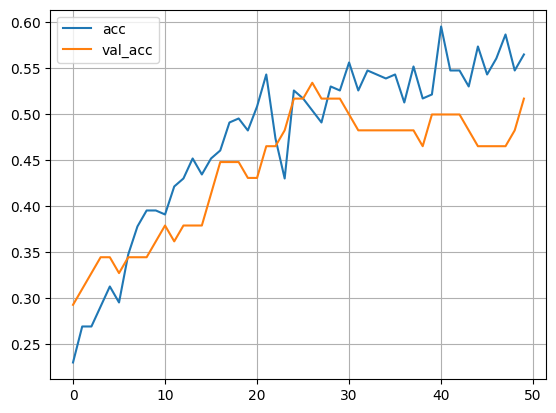

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5115 - loss: 0.8692 
[0.8779598474502563, 0.517241358757019]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 1 
Error in Simulation Health for Each Blade :  -0.004678914041469806
Error in Simulation Health T  for Each Blade :  -1.1931018683748618
Error in Simulation Fault for Each Blade :  0.9560627519305305  --- MSE Fault S ----  0.09109704381085594
Error in Simulation Fault T  for Each Blade :  0.9560627519305305  --- Mean Squared Error Fault T :  7.209256292270801
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  0.20005733289396188
Error in Simulation Health T  for Each Blade :  1.0549829517435727
Error in Simulation Fault for Each Blade :  -1.0408105408567068  --- MSE Fault S ----  0.09532792649015288
Error in Simulation Fault T  for Each Blade :  -1.0408105408567068  --- Mean Squared Error Fault T :  4.060563123685456
 -----

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.46551724137931033
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.2600 - loss: 1.4167 - val_acc: 0.2241 - val_loss: 1.4700
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2374 - loss: 1.4341 - val_acc: 0.2241 - val_loss: 1.4495
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3369 - loss: 1.3744 - val_acc: 0.2241 - val_loss: 1.4299
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3242 - loss: 1.3746 - val_acc: 0.2414 - val_loss: 1.4120
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3592 - loss: 1.3446 - val_acc: 0.2759 - val_loss: 1.3927
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3584 - loss: 1.3239 - val_acc: 0.3103 - val_loss: 1.3741
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3283 - loss: 1.3310 - val_acc: 0.3276 - val_loss: 1.3554
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3780 - loss: 1.3034 - val_acc: 0.3276 - val_loss: 1.3371
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3794 - loss: 1.3055 - val_acc: 0.327

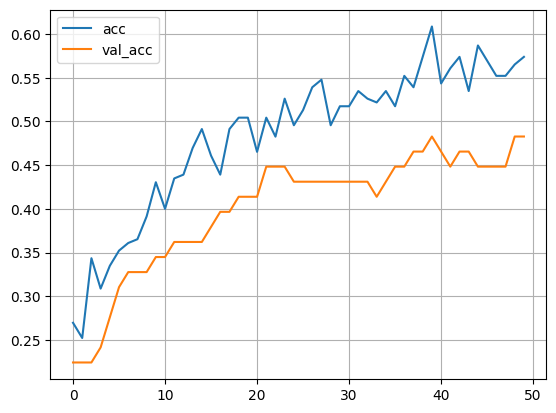

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4677 - loss: 0.9279 
[0.9336792230606079, 0.48275861144065857]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 2 
Error in Simulation Health for Each Blade :  0.7462802527388941
Error in Simulation Health T  for Each Blade :  2.415038619793635
Error in Simulation Fault for Each Blade :  0.3764136564613574  --- MSE Fault S ----  0.050198063229961565
Error in Simulation Fault T  for Each Blade :  0.3764136564613574  --- Mean Squared Error Fault T :  4.000525173749725
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -1.0799185140373955
Error in Simulation Health T  for Each Blade :  1.277043215031224
Error in Simulation Fault for Each Blade :  -1.7238289486089755  --- MSE Fault S ----  0.09153907092885279
Error in Simulation Fault T  for Each Blade :  -1.7238289486089755  --- Mean Squared Error Fault T :  12.741025621068166
 ----- f

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.2652 - loss: 1.5154 - val_acc: 0.1897 - val_loss: 1.5362
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2392 - loss: 1.4752 - val_acc: 0.2241 - val_loss: 1.4850
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3106 - loss: 1.3876 - val_acc: 0.2586 - val_loss: 1.4518
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3206 - loss: 1.3783 - val_acc: 0.2931 - val_loss: 1.4250
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2721 - loss: 1.3499 - val_acc: 0.3276 - val_loss: 1.4017
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3492 - loss: 1.3601 - val_acc: 0.3966 - val_loss: 1.3796
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3276 - loss: 1.3452 - val_acc: 0.3966 - val_loss: 1.3618
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3902 - loss: 1.3374 - val_acc: 0.4138 - val_loss: 1.3447
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4242 - loss: 1.3015 - val_acc: 0.448

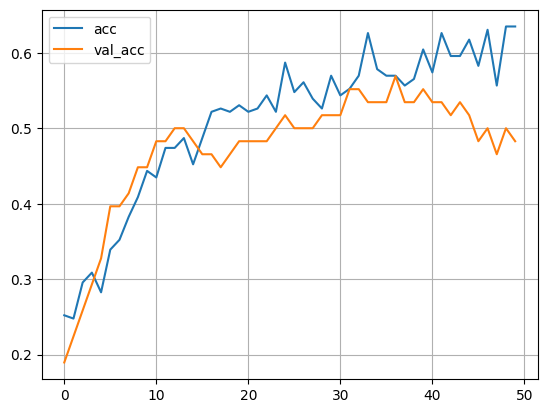

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4989 - loss: 0.8616 
[0.8847565054893494, 0.48275861144065857]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 3 
Error in Simulation Health for Each Blade :  0.5393525424440038
Error in Simulation Health T  for Each Blade :  2.8126299060040703
Error in Simulation Fault for Each Blade :  -0.029983448712873395  --- MSE Fault S ----  0.030344847499673696
Error in Simulation Fault T  for Each Blade :  -0.029983448712873395  --- Mean Squared Error Fault T :  6.660716967366624
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  0.2731822374037356
Error in Simulation Health T  for Each Blade :  3.711938063766315
Error in Simulation Fault for Each Blade :  -0.31052105411761843  --- MSE Fault S ----  0.09180210161813096
Error in Simulation Fault T  for Each Blade :  -0.31052105411761843  --- Mean Squared Error Fault T :  10.793157344727854


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3793103448275862
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - acc: 0.2551 - loss: 1.5325 - val_acc: 0.2586 - val_loss: 1.5067
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2465 - loss: 1.4594 - val_acc: 0.2586 - val_loss: 1.4650
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2708 - loss: 1.4156 - val_acc: 0.2586 - val_loss: 1.4290
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2797 - loss: 1.4047 - val_acc: 0.2759 - val_loss: 1.4059
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2727 - loss: 1.3752 - val_acc: 0.2759 - val_loss: 1.3885
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2734 - loss: 1.3856 - val_acc: 0.3103 - val_loss: 1.3716
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3132 - loss: 1.3665 - val_acc: 0.3276 - val_loss: 1.3585
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3027 - loss: 1.3362 - val_acc: 0.3448 - val_loss: 1.3482
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2440 - loss: 1.3490 - val_acc: 0.32

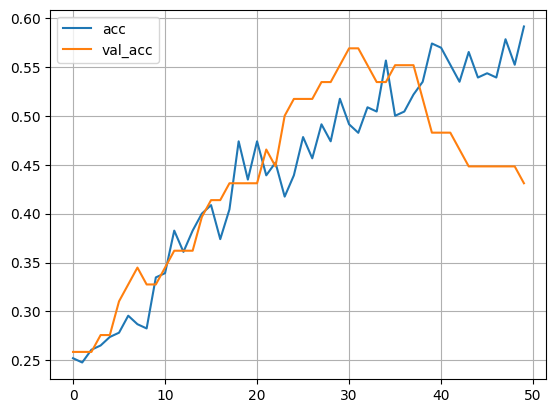

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4540 - loss: 1.0208 
[1.0343531370162964, 0.43103447556495667]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 4 
Error in Simulation Health for Each Blade :  -0.23216517673181514
Error in Simulation Health T  for Each Blade :  2.4818893545210337
Error in Simulation Fault for Each Blade :  0.4960759211250587  --- MSE Fault S ----  0.004710507710285333
Error in Simulation Fault T  for Each Blade :  0.4960759211250587  --- Mean Squared Error Fault T :  6.0560438160799075
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  0.5867054053990657
Error in Simulation Health T  for Each Blade :  4.464126183643004
Error in Simulation Fault for Each Blade :  0.9926085724890523  --- MSE Fault S ----  0.07753301876317618
Error in Simulation Fault T  for Each Blade :  0.9926085724890523  --- Mean Squared Error Fault T :  12.499371563363363
 ----- 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4827586206896552
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - acc: 0.3430 - loss: 1.3850 - val_acc: 0.3448 - val_loss: 1.4045
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3790 - loss: 1.3745 - val_acc: 0.3793 - val_loss: 1.3858
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3187 - loss: 1.3807 - val_acc: 0.4138 - val_loss: 1.3684
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2913 - loss: 1.3631 - val_acc: 0.4483 - val_loss: 1.3539
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3783 - loss: 1.3267 - val_acc: 0.4828 - val_loss: 1.3417
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3826 - loss: 1.3268 - val_acc: 0.4828 - val_loss: 1.3273
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3494 - loss: 1.3079 - val_acc: 0.5000 - val_loss: 1.3130
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4007 - loss: 1.3117 - val_acc: 0.4828 - val_loss: 1.2988
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4765 - loss: 1.2385 - val_acc: 0.4

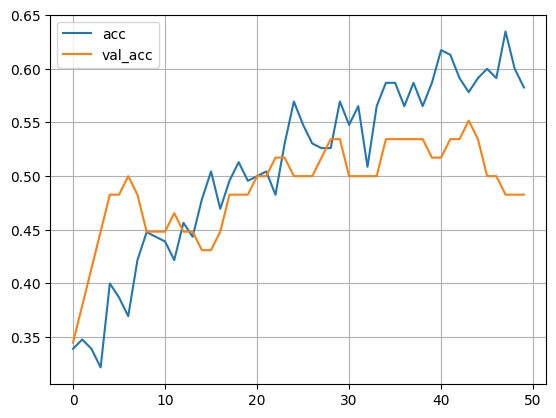

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5093 - loss: 0.9152 
[0.930264413356781, 0.48275861144065857]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 1 
Error in Simulation Health for Each Blade :  1.7304879935608763
Error in Simulation Health T  for Each Blade :  1.3107758748764677
Error in Simulation Fault for Each Blade :  -1.0895336361158434  --- MSE Fault S ----  0.07022701331961591
Error in Simulation Fault T  for Each Blade :  -1.0895336361158434  --- Mean Squared Error Fault T :  8.55864592484318
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  1.0033790899058963
Error in Simulation Health T  for Each Blade :  -0.6782827199247992
Error in Simulation Fault for Each Blade :  -4.310175008549779  --- MSE Fault S ----  0.4665723438186881
Error in Simulation Fault T  for Each Blade :  -4.310175008549779  --- Mean Squared Error Fault T :  12.529637428619482
 ----- for

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.2362 - loss: 1.4058 - val_acc: 0.3448 - val_loss: 1.3744
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2752 - loss: 1.3761 - val_acc: 0.3448 - val_loss: 1.3575
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3031 - loss: 1.3474 - val_acc: 0.3621 - val_loss: 1.3443
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2886 - loss: 1.3504 - val_acc: 0.3793 - val_loss: 1.3345
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2747 - loss: 1.3581 - val_acc: 0.3793 - val_loss: 1.3264
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3403 - loss: 1.3158 - val_acc: 0.3966 - val_loss: 1.3186
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3241 - loss: 1.3298 - val_acc: 0.4310 - val_loss: 1.3110
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3355 - loss: 1.3011 - val_acc: 0.4310 - val_loss: 1.3015
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3565 - loss: 1.3021 - val_acc: 0.4310 -

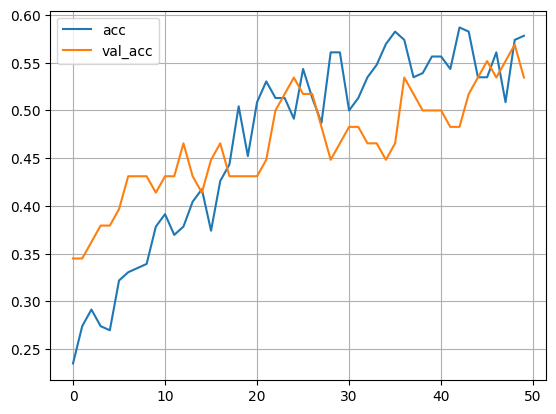

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.5751 - loss: 0.8505
[0.8712804317474365, 0.5344827771186829]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 2 
Error in Simulation Health for Each Blade :  -1.4653998648100792
Error in Simulation Health T  for Each Blade :  1.2943774968393784
Error in Simulation Fault for Each Blade :  -3.1327804773296064  --- MSE Fault S ----  0.19977095560647914
Error in Simulation Fault T  for Each Blade :  -3.1327804773296064  --- Mean Squared Error Fault T :  8.099848274715486
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -0.37991182709938154
Error in Simulation Health T  for Each Blade :  3.8240412083326047
Error in Simulation Fault for Each Blade :  -1.3789697613013712  --- MSE Fault S ----  0.09865565541989492
Error in Simulation Fault T  for Each Blade :  -1.3789697613013712  --- Mean Squared Error Fault T :  4.45246204312315
 -----

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4827586206896552
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - acc: 0.2510 - loss: 1.5268 - val_acc: 0.2414 - val_loss: 1.4481
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.2334 - loss: 1.4774 - val_acc: 0.2414 - val_loss: 1.4275
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.2423 - loss: 1.4391 - val_acc: 0.2586 - val_loss: 1.4122
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2360 - loss: 1.4707 - val_acc: 0.2414 - val_loss: 1.4002
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2312 - loss: 1.4258 - val_acc: 0.2586 - val_loss: 1.3891
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.2527 - loss: 1.3781 - val_acc: 0.2586 - val_loss: 1.3803
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2283 - loss: 1.3766 - val_acc: 0.2931 - val_loss: 1.3704
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.3015 - loss: 1.3578 - val_acc: 0.3103 - val_loss: 1.3623
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.2997 - loss: 1.3561 - val_acc: 0.

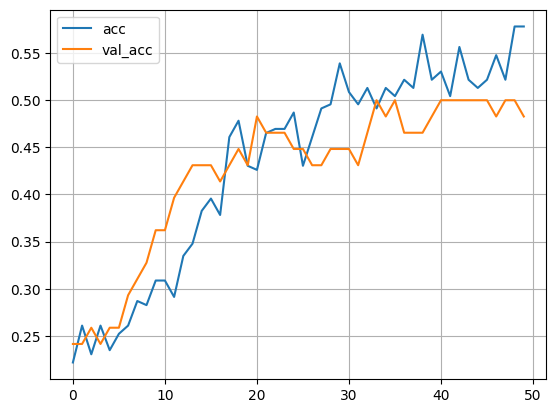

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4885 - loss: 0.9011 
[0.9055393934249878, 0.48275861144065857]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 3 
Error in Simulation Health for Each Blade :  -0.04704718841404487
Error in Simulation Health T  for Each Blade :  1.1456602418773683
Error in Simulation Fault for Each Blade :  1.8722367631487011  --- MSE Fault S ----  0.10573567634938048
Error in Simulation Fault T  for Each Blade :  1.8722367631487011  --- Mean Squared Error Fault T :  7.287616363479548
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -0.6167173448615557
Error in Simulation Health T  for Each Blade :  4.845355004744199
Error in Simulation Fault for Each Blade :  0.5309503933588042  --- MSE Fault S ----  0.05409733409590051
Error in Simulation Fault T  for Each Blade :  0.5309503933588042  --- Mean Squared Error Fault T :  2.7786482669411137
 ----- f

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.2375 - loss: 1.5026 - val_acc: 0.2759 - val_loss: 1.4464
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2055 - loss: 1.4651 - val_acc: 0.2414 - val_loss: 1.4174
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2222 - loss: 1.4338 - val_acc: 0.2931 - val_loss: 1.3948
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2401 - loss: 1.4238 - val_acc: 0.3276 - val_loss: 1.3763
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2567 - loss: 1.4090 - val_acc: 0.3276 - val_loss: 1.3613
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3057 - loss: 1.3534 - val_acc: 0.3448 - val_loss: 1.3450
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.3118 - loss: 1.3547 - val_acc: 0.4138 - val_loss: 1.3298
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3093 - loss: 1.3758 - val_acc: 0.4828 - val_loss: 1.3176
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3262 - loss: 1.3372 - val_acc: 0.

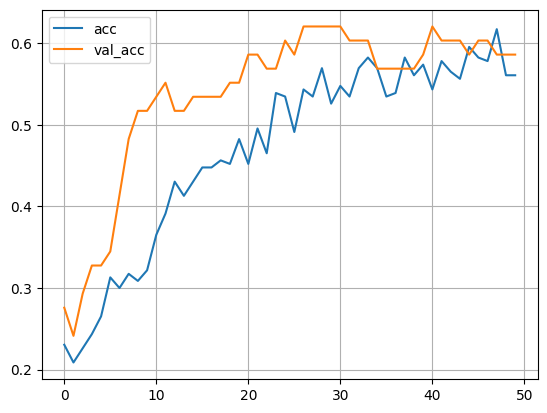

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.6304 - loss: 0.8688
[0.9097933173179626, 0.5862069129943848]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 4 
Error in Simulation Health for Each Blade :  0.18412800772566706
Error in Simulation Health T  for Each Blade :  3.2174611148827648
Error in Simulation Fault for Each Blade :  -0.2676699617566427  --- MSE Fault S ----  0.0453773174241297
Error in Simulation Fault T  for Each Blade :  -0.2676699617566427  --- Mean Squared Error Fault T :  2.845795904100736
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -0.06080790949744497
Error in Simulation Health T  for Each Blade :  2.934345547844453
Error in Simulation Fault for Each Blade :  0.885794808493102  --- MSE Fault S ----  0.09497640172271514
Error in Simulation Fault T  for Each Blade :  0.885794808493102  --- Mean Squared Error Fault T :  9.148299139626198
 ----- for 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4827586206896552
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.2630 - loss: 1.5824 - val_acc: 0.2586 - val_loss: 1.5034
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2973 - loss: 1.4682 - val_acc: 0.2586 - val_loss: 1.4509
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2890 - loss: 1.4916 - val_acc: 0.2759 - val_loss: 1.4163
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3354 - loss: 1.3961 - val_acc: 0.2931 - val_loss: 1.3885
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3010 - loss: 1.4221 - val_acc: 0.3276 - val_loss: 1.3695
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3403 - loss: 1.4058 - val_acc: 0.3448 - val_loss: 1.3567
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3637 - loss: 1.3528 - val_acc: 0.3621 - val_loss: 1.3469
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3213 - loss: 1.3517 - val_acc: 0.3966 - val_loss: 1.3398
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.4024 - loss: 1.3429 - val_acc: 0.4

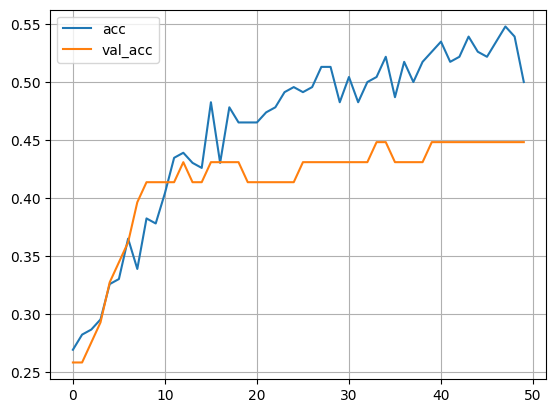

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4551 - loss: 0.9379
[0.9694796800613403, 0.4482758641242981]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 1 
Error in Simulation Health for Each Blade :  0.4213048772370773
Error in Simulation Health T  for Each Blade :  1.3944169072609132
Error in Simulation Fault for Each Blade :  0.7725047495992692  --- MSE Fault S ----  0.040560672572524915
Error in Simulation Fault T  for Each Blade :  0.7725047495992692  --- Mean Squared Error Fault T :  4.877592813182271
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  0.5751795319290343
Error in Simulation Health T  for Each Blade :  -0.4801839817077931
Error in Simulation Fault for Each Blade :  -0.541310194091819  --- MSE Fault S ----  0.04721452299978727
Error in Simulation Fault T  for Each Blade :  -0.541310194091819  --- Mean Squared Error Fault T :  6.2800640705759
 ----- for e

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.39655172413793105
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.2843 - loss: 1.5559 - val_acc: 0.2586 - val_loss: 1.5311
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2970 - loss: 1.5036 - val_acc: 0.2586 - val_loss: 1.4841
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2948 - loss: 1.3726 - val_acc: 0.2931 - val_loss: 1.4486
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2454 - loss: 1.4079 - val_acc: 0.2586 - val_loss: 1.4165
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2734 - loss: 1.3769 - val_acc: 0.2759 - val_loss: 1.3900
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3325 - loss: 1.3721 - val_acc: 0.3276 - val_loss: 1.3674
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3556 - loss: 1.3407 - val_acc: 0.3448 - val_loss: 1.3491
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4211 - loss: 1.3339 - val_acc: 0.3621 - val_loss: 1.3291
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3739 - loss: 1.2959 - val_acc: 0.

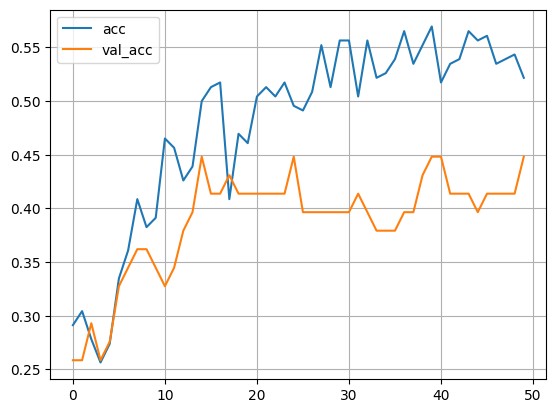

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4447 - loss: 0.9179 
[0.930145800113678, 0.4482758641242981]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 2 
Error in Simulation Health for Each Blade :  -1.8947318691782573
Error in Simulation Health T  for Each Blade :  2.949152311157518
Error in Simulation Fault for Each Blade :  0.5577893609647848  --- MSE Fault S ----  0.06069259872576857
Error in Simulation Fault T  for Each Blade :  0.5577893609647848  --- Mean Squared Error Fault T :  12.14097016597114
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -0.41389582249981927
Error in Simulation Health T  for Each Blade :  1.7091313001904842
Error in Simulation Fault for Each Blade :  0.08271595281928779  --- MSE Fault S ----  0.04751861042939178
Error in Simulation Fault T  for Each Blade :  0.08271595281928779  --- Mean Squared Error Fault T :  6.642764139584345
 ----- fo

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4482758620689655
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - acc: 0.2966 - loss: 1.3623 - val_acc: 0.3448 - val_loss: 1.2960
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2847 - loss: 1.3644 - val_acc: 0.3621 - val_loss: 1.2837
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3002 - loss: 1.3819 - val_acc: 0.3793 - val_loss: 1.2733
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3641 - loss: 1.2927 - val_acc: 0.3966 - val_loss: 1.2626
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3001 - loss: 1.3360 - val_acc: 0.4310 - val_loss: 1.2518
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3549 - loss: 1.2854 - val_acc: 0.4310 - val_loss: 1.2382
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3840 - loss: 1.2433 - val_acc: 0.3793 - val_loss: 1.2221
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4291 - loss: 1.2081 - val_acc: 0.4138 - val_loss: 1.2069
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3736 - loss: 1.2203 - val_acc: 0.44

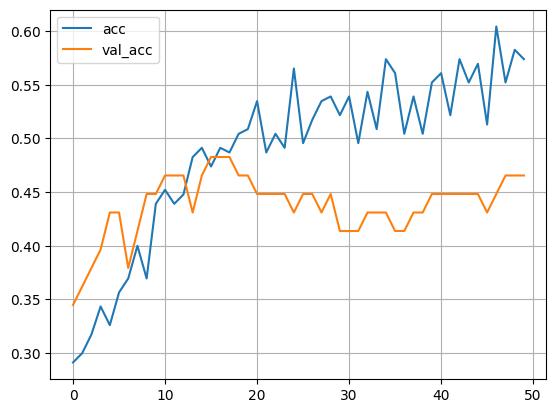

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.4978 - loss: 0.8774
[0.8983838558197021, 0.4655172526836395]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 3 
Error in Simulation Health for Each Blade :  -0.06346700178418896
Error in Simulation Health T  for Each Blade :  1.5576491285460952
Error in Simulation Fault for Each Blade :  0.5303117427452717  --- MSE Fault S ----  0.07311765429960833
Error in Simulation Fault T  for Each Blade :  0.5303117427452717  --- Mean Squared Error Fault T :  8.899220129500742
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -0.4689615706698791
Error in Simulation Health T  for Each Blade :  2.4036611994394996
Error in Simulation Fault for Each Blade :  0.309633845339381  --- MSE Fault S ----  0.0386639633117259
Error in Simulation Fault T  for Each Blade :  0.309633845339381  --- Mean Squared Error Fault T :  6.2636443169161256
 ----- for 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5344827586206896
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - acc: 0.1877 - loss: 1.5411 - val_acc: 0.2414 - val_loss: 1.5152
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2374 - loss: 1.4894 - val_acc: 0.2586 - val_loss: 1.4703
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2395 - loss: 1.4608 - val_acc: 0.2586 - val_loss: 1.4346
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.2394 - loss: 1.4209 - val_acc: 0.3276 - val_loss: 1.4049
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2991 - loss: 1.4194 - val_acc: 0.3621 - val_loss: 1.3783
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2959 - loss: 1.3872 - val_acc: 0.4138 - val_loss: 1.3550
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2712 - loss: 1.3634 - val_acc: 0.4138 - val_loss: 1.3357
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3477 - loss: 1.3286 - val_acc: 0.4310 - val_loss: 1.3173
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3673 - loss: 1.3309 - val_acc: 0.

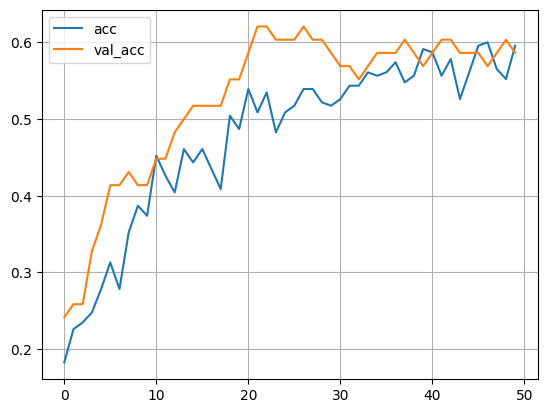

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5679 - loss: 0.8597 
[0.859607458114624, 0.5862069129943848]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 4 
Error in Simulation Health for Each Blade :  0.6256544942582416
Error in Simulation Health T  for Each Blade :  6.138280845512313
Error in Simulation Fault for Each Blade :  0.4446258252869937  --- MSE Fault S ----  0.048714749840498256
Error in Simulation Fault T  for Each Blade :  0.4446258252869937  --- Mean Squared Error Fault T :  6.29272129742792
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -0.5201669225853742
Error in Simulation Health T  for Each Blade :  5.43067273818452
Error in Simulation Fault for Each Blade :  1.2663223194745723  --- MSE Fault S ----  0.07560843021307477
Error in Simulation Fault T  for Each Blade :  1.2663223194745723  --- Mean Squared Error Fault T :  8.068578960008898
 ----- for each

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.39655172413793105
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.2804 - loss: 1.4396 - val_acc: 0.2414 - val_loss: 1.3733
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3008 - loss: 1.3708 - val_acc: 0.2759 - val_loss: 1.3606
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3186 - loss: 1.3622 - val_acc: 0.2931 - val_loss: 1.3485
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3530 - loss: 1.3521 - val_acc: 0.3276 - val_loss: 1.3378
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3270 - loss: 1.2972 - val_acc: 0.3276 - val_loss: 1.3308
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3369 - loss: 1.3352 - val_acc: 0.3448 - val_loss: 1.3241
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3700 - loss: 1.3138 - val_acc: 0.3966 - val_loss: 1.3167
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3964 - loss: 1.3264 - val_acc: 0.4138 - val_loss: 1.3063
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4651 - loss: 1.2604 - val_acc: 0.4310

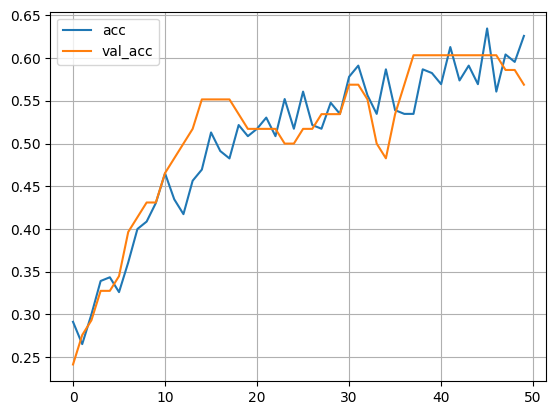

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5981 - loss: 0.8227 
[0.8388099074363708, 0.568965494632721]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 1 
Error in Simulation Health for Each Blade :  -1.0058383878894628
Error in Simulation Health T  for Each Blade :  1.2839454162485153
Error in Simulation Fault for Each Blade :  2.3423926814367513  --- MSE Fault S ----  0.16029089083144743
Error in Simulation Fault T  for Each Blade :  2.3423926814367513  --- Mean Squared Error Fault T :  9.153035520298717
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -0.42787993298295124
Error in Simulation Health T  for Each Blade :  -0.24812637883008826
Error in Simulation Fault for Each Blade :  -1.8610390606642202  --- MSE Fault S ----  0.18949751722509955
Error in Simulation Fault T  for Each Blade :  -1.8610390606642202  --- Mean Squared Error Fault T :  10.154797760621745
 ----

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.43103448275862066
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.2273 - loss: 1.5574 - val_acc: 0.2759 - val_loss: 1.5831
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2928 - loss: 1.4823 - val_acc: 0.2759 - val_loss: 1.5334
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2623 - loss: 1.4795 - val_acc: 0.2586 - val_loss: 1.4872
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3037 - loss: 1.4508 - val_acc: 0.3103 - val_loss: 1.4485
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3345 - loss: 1.3846 - val_acc: 0.3103 - val_loss: 1.4111
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3630 - loss: 1.3787 - val_acc: 0.3448 - val_loss: 1.3763
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3430 - loss: 1.3717 - val_acc: 0.3448 - val_loss: 1.3442
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3346 - loss: 1.3385 - val_acc: 0.4138 - val_loss: 1.3136
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3624 - loss: 1.3085 - val_acc: 0.

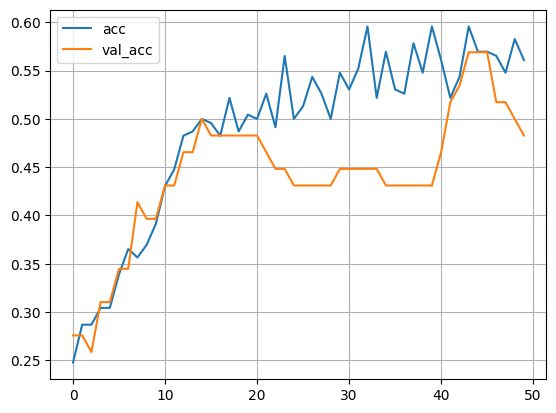

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4781 - loss: 0.8561
[0.8644835352897644, 0.48275861144065857]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 2 
Error in Simulation Health for Each Blade :  -1.638616900324231
Error in Simulation Health T  for Each Blade :  1.61470140948845
Error in Simulation Fault for Each Blade :  -0.7174018658061729  --- MSE Fault S ----  0.12693925218457736
Error in Simulation Fault T  for Each Blade :  -0.7174018658061729  --- Mean Squared Error Fault T :  9.980334918235155
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  0.21313687256738656
Error in Simulation Health T  for Each Blade :  3.1589889739740213
Error in Simulation Fault for Each Blade :  1.9551165051254364  --- MSE Fault S ----  0.1306436726390491
Error in Simulation Fault T  for Each Blade :  1.9551165051254364  --- Mean Squared Error Fault T :  7.192870787363734
 ----- for 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.46551724137931033
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - acc: 0.2754 - loss: 1.4643 - val_acc: 0.3448 - val_loss: 1.3212
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3115 - loss: 1.4133 - val_acc: 0.3793 - val_loss: 1.2907
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3559 - loss: 1.3612 - val_acc: 0.3966 - val_loss: 1.2675
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3087 - loss: 1.3521 - val_acc: 0.4310 - val_loss: 1.2515
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3830 - loss: 1.3433 - val_acc: 0.4310 - val_loss: 1.2357
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3315 - loss: 1.3227 - val_acc: 0.4828 - val_loss: 1.2194
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3742 - loss: 1.2897 - val_acc: 0.4828 - val_loss: 1.2041
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3550 - loss: 1.3317 - val_acc: 0.5000 - val_loss: 1.1891
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.3641 - loss: 1.2512 - val_acc: 0.5

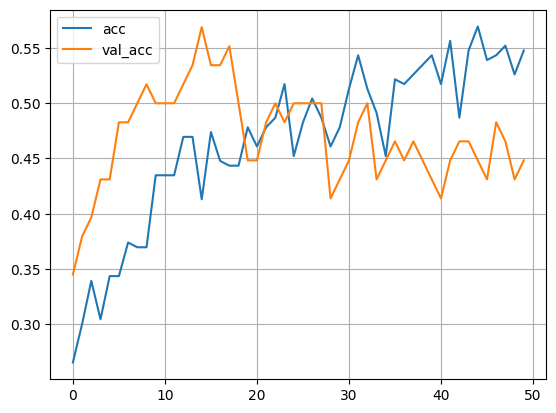

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4864 - loss: 0.8913
[0.8962787389755249, 0.4482758641242981]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 3 
Error in Simulation Health for Each Blade :  -0.8161801028241968
Error in Simulation Health T  for Each Blade :  4.172788399500891
Error in Simulation Fault for Each Blade :  -1.3305609541269128  --- MSE Fault S ----  0.07982179329563893
Error in Simulation Fault T  for Each Blade :  -1.3305609541269128  --- Mean Squared Error Fault T :  11.176174427832152
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  -1.6017826710525858
Error in Simulation Health T  for Each Blade :  3.1797264443228332
Error in Simulation Fault for Each Blade :  -4.061034824675749  --- MSE Fault S ----  0.5389245395704768
Error in Simulation Fault T  for Each Blade :  -4.061034824675749  --- Mean Squared Error Fault T :  10.473292724832694
 ----- f

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4482758620689655
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.2615 - loss: 1.4598 - val_acc: 0.2931 - val_loss: 1.5095
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2937 - loss: 1.4197 - val_acc: 0.3448 - val_loss: 1.4536
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2946 - loss: 1.3841 - val_acc: 0.3966 - val_loss: 1.4102
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3470 - loss: 1.3733 - val_acc: 0.3793 - val_loss: 1.3757
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2878 - loss: 1.3796 - val_acc: 0.3966 - val_loss: 1.3488
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3664 - loss: 1.2931 - val_acc: 0.4138 - val_loss: 1.3294
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3980 - loss: 1.3183 - val_acc: 0.4483 - val_loss: 1.3127
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3810 - loss: 1.2800 - val_acc: 0.4310 - val_loss: 1.2974
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4867 - loss: 1.2293 - val_acc: 0.4

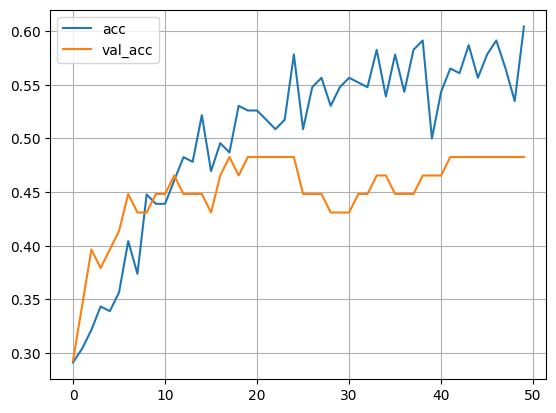

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4781 - loss: 0.9628 
[0.9596295952796936, 0.48275861144065857]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 4 
Error in Simulation Health for Each Blade :  -0.08856404282027053
Error in Simulation Health T  for Each Blade :  3.5147367925411404
Error in Simulation Fault for Each Blade :  0.44775261207572514  --- MSE Fault S ----  0.061400843058120304
Error in Simulation Fault T  for Each Blade :  0.44775261207572514  --- Mean Squared Error Fault T :  8.732194306189065
 ----- for each Blade Simulated ----- 
Error in Simulation Health for Each Blade :  1.1567796823268286
Error in Simulation Health T  for Each Blade :  3.494107531800105
Error in Simulation Fault for Each Blade :  -0.8688126189509249  --- MSE Fault S ----  0.050844026520231754
Error in Simulation Fault T  for Each Blade :  -0.8688126189509249  --- Mean Squared Error Fault T :  1.9159181374086682
 --

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4827586206896552
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - acc: 0.2376 - loss: 1.5041 - val_acc: 0.1552 - val_loss: 1.4970
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2926 - loss: 1.4155 - val_acc: 0.1379 - val_loss: 1.4664
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.3060 - loss: 1.4312 - val_acc: 0.1724 - val_loss: 1.4384
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.3081 - loss: 1.3875 - val_acc: 0.2241 - val_loss: 1.4090
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3176 - loss: 1.3442 - val_acc: 0.2759 - val_loss: 1.3844
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.3592 - loss: 1.3309 - val_acc: 0.3103 - val_loss: 1.3618
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3243 - loss: 1.3212 - val_acc: 0.3276 - val_loss: 1.3378
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4606 - loss: 1.2852 - val_acc: 0.3276 - val_loss: 1.3150
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4051 - loss: 1.2835 - val_acc: 0.

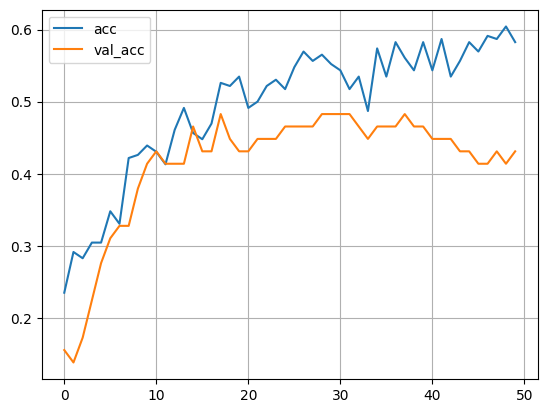

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4436 - loss: 0.8699 
[0.8906857967376709, 0.43103447556495667]
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 


In [17]:
for iter_alpha in total_alpha_content :
  for iter_flat in total_flat_content :
    print(f"iter_alpha : {iter_alpha} | iter_flat : {iter_flat} ")
    params_health   = []
    params_fault    = []
    params_fault_t  = []
    params_health_t = []
    for iter_link in total_file_link :
      df_table_change     = pd.read_csv(iter_link)
      for locate in total_location:
        related_x = -1
        related_y = -1
        related_z = -1
        for iteration in range(3):
          alpha = 0
          term  = 0
          Flat_Add = 0
          noise_activate = ( (np.random.randn() + 1 ) / 100 )
          #print( f'Alpha : {iter_alpha} ' ,  f'Table Change : {iter_link}' , ' -- ' , f'Locate : {locate} ' , ' -- ' , f"Iter : {iteration}" , ' -- ' , '')
          select_location_combin_flap_term = 0
          select_locatiom_flap = 0

          total_health_iter  = []
          total_health_iter_t = []
          total_fault_iter   = []
          total_fault_t_iter = []
          new_data_simulated_ = []
          new_data_simulated_fault = []
          new_data_simulated_fault_t = []
          new_data_simulated_health_t = []



          for i in range(df_table_change.shape[0]):
            x_mean = df_table_change.iloc[i, 1]
            x_std  = df_table_change.iloc[i, 2]
            y_mean = df_table_change.iloc[i, 3]
            y_std  = df_table_change.iloc[i, 4]
            z_mean = df_table_change.iloc[i, 5]
            z_std  = df_table_change.iloc[i, 6]

            if i > locate :
              alpha = iter_alpha
              term  = -1 * ( alpha * abs( i - locate ) + noise_activate )
              Flat_Add  = iter_flat / 10

            for element in total_points[i * 3: (i + 1) * 3, :]:
              x_sample = element[0]
              y_sample = element[1]
              z_sample = element[2]
              rng = np.random.default_rng()
              x_added  = rng.normal(x_mean, x_std, size=1)
              x_added  = x_added.tolist()[0]
              x_sample += related_x * x_added

              y_added  = rng.normal(y_mean, y_std, size=1)
              y_added  = y_added.tolist()[0]
              y_sample += related_y * y_added

              z_added  = rng.normal(z_mean, z_std, size=1)
              z_base   = z_sample

              z_added_term  = z_added.tolist()[0] + term
              z_added       = z_added.tolist()[0]
              z_sample_new_term = z_base + related_z * z_added_term
              z_sample_new      = z_base + related_z * z_added
              z_flat  = z_sample_new_term
              z_flap_health = z_sample_new


              if select_location_combin_flap_term  == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flat = z_sample_new_term + Flat_Add


              if select_locatiom_flap == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flap_health = z_sample_new + Flat_Add







              new_data_simulated_.append([ x_sample, y_sample, z_sample_new  ])
              new_data_simulated_fault.append([ x_sample, y_sample, z_sample_new_term  ])
              new_data_simulated_fault_t.append([ x_sample, y_sample, z_flat  ])
              new_data_simulated_health_t.append([x_sample , y_sample , z_flap_health ])

              total_health_iter.append([ x_sample, y_sample, z_sample_new  ])
              total_fault_iter.append([ x_sample, y_sample, z_sample_new_term  ])
              total_fault_t_iter.append([ x_sample, y_sample, z_flat  ])
              total_health_iter_t.append([x_sample , y_sample , z_flap_health ])



          # fig = plt.figure(figsize=(20 , 10 ))

          # ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )
          # ax1 = fig.add_subplot(1 , 6 , 2 , projection='3d' )
          # ax2 = fig.add_subplot(1 , 6 , 3 , projection='3d' )
          # ax3 = fig.add_subplot(1 , 6 , 4 , projection='3d' )
          # ax4 = fig.add_subplot(1 , 6 , 5 , projection='3d' )
          # ax5 = fig.add_subplot(1 , 6 , 6 , projection='3d' )

          # ax6 = fig.add_subplot(3 , 6 , 1 )
          # ax7 = fig.add_subplot(3 , 6 , 2 )
          # ax8 = fig.add_subplot(3 , 6 , 3 )

          # # ax3 = fig.add_subplot(1 , 6 , 4 )
          # # ax4 = fig.add_subplot(1 , 6 , 5 )
          # # ax5 = fig.add_subplot(1 , 6 , 6 )






          # total_health_iter = np.array(total_health_iter)
          # total_health_iter = np.array(total_health_iter)
          # total_fault_iter = np.array(total_fault_iter)
          # total_fault_t_iter = np.array(total_fault_t_iter)
          # total_health_iter_t = np.array(total_health_iter_t)
          # print(f"iter_alpha : {iter_alpha} , flap: {iter_flat} , locate : {locate} ,  iteration : {iteration} ")

          # ax0.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ] , total_health_iter[: , 2 ]  , label='health' , c = 'r'   )
          # ax0.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  , label='fault_alpha' ,  c = 'b' )
          # ax1.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='blue', s = 30 , alpha = 0.5    )
          # ax1.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red' , s = 30 )
          # ax2.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red'  , s = 30  )

          # ax3.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='fault_void' , c ='blue'  )
          # ax3.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1]  , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='red' )
          # ax3.set_xlabel("axis x ")
          # ax3.set_ylabel("axis y ")

          # ax4.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='health' , c ='blue',  )
          # ax4.scatter3D(total_fault_t_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha+ void ' , c='red' ,  )
          # ax4.set_xlabel("axis x")
          # ax4.set_ylabel("axis y")

          # ax5.scatter3D(total_health_iter[: , 0 ]  , total_health_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='health' , c ='blue' ,  )
          # ax5.scatter3D(total_health_iter_t[: , 0 ] , total_health_iter_t[: , 1] , total_fault_t_iter[: , 2 ]  , label='fault_void' , c='red' ,  )
          # ax5.set_xlabel("axis x ")
          # ax5.set_ylabel("axis y ")

          # ax6.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 , alpha = 0.7 )
          # ax6.scatter(total_health_iter_t[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_void' , c='r' , s = 30 , alpha = 0.6  )
          # ax6.set_xlabel("axis  x ")
          # ax6.set_ylabel("axis  y ")
          # ax6.set_title(f"alpha : {iter_alpha} , void : {iter_flat/10} ")

          # ax7.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 , alpha = 0.2 )
          # ax7.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='r' , s = 30 , alpha = 0.5  )
          # ax7.set_xlabel("axis  x ")
          # ax7.set_ylabel("axis  y ")

          # ax8.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_alpha' , c='b' , )
          # ax8.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='F_alpha + void' , c='r')
          # ax8.set_xlabel("axis  x ")
          # ax8.set_ylabel("axis  y ")


          # ax0.legend()
          # ax0.grid()
          # ax0
          # ax1.legend()
          # ax1.grid()
          # ax2.legend()
          # ax2.grid()
          # ax3.legend()
          # ax3.grid()

          # ax4.legend()
          # ax4.grid()
          # ax5.legend()
          # ax5.grid()


          # ax6.legend()
          # ax6.grid()

          # ax7.legend()
          # ax7.grid()
          # ax8.legend()
          # ax8.grid()

          # plt.show()




          new_data_simulated_         = np.array(new_data_simulated_)
          new_data_simulated_fault    = np.array(new_data_simulated_fault)
          new_data_simulated_fault_t  = np.array(new_data_simulated_fault_t)
          new_data_simulated_health_t = np.array(new_data_simulated_health_t)


          #fig = plt.figure(figsize=(30, 10))
          df_health = pd.DataFrame()
          df_health['X_'] = new_data_simulated_[:, 0]
          df_health['Y_'] = new_data_simulated_[:, 1]
          df_health['Z_'] = new_data_simulated_[:, 2]

          poly = PolynomialFeatures(degree=2)
          x_poly = poly.fit_transform(df_health[['X_', 'Y_']])
          scaler = StandardScaler()
          df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander['Z_'] = df_health['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model = LinearRegression()
          model.fit(x_train, z_train)
          z_predict = model.predict(x_test)
          intercept_0 = model.intercept_
          coef1 = model.coef_[0]
          coef2 = model.coef_[1]
          coef3 = model.coef_[2]
          coef4 = model.coef_[3]
          coef5 = model.coef_[4]
          coef6 = model.coef_[5]

          total_new_generate = []
          total_error_health = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander.iloc[i, 0] + coef2 * df_stander.iloc[i, 1] + coef3 * df_stander.iloc[i, 2] + coef4 * df_stander.iloc[i, 3] + coef5 * df_stander.iloc[i, 4]
            + coef6 * df_stander.iloc[i, 5]
            total_new_generate.append(new_value)
            error = df_stander.iloc[i, -1] - new_value
            total_error_health += error

          print("Error in Simulation Health for Each Blade : " , total_error_health )

          #class health == 0
          params_health.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict, z_test),locate , 0 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class health t ----

          df_health_t = pd.DataFrame()
          df_health_t['X_'] = new_data_simulated_health_t[:, 0]
          df_health_t['Y_'] = new_data_simulated_health_t[:, 1]
          df_health_t['Z_'] = new_data_simulated_health_t[:, 2]

          poly_health_t = PolynomialFeatures(degree=2)
          x_poly_health_t = poly_health_t.fit_transform(df_health_t[['X_', 'Y_']])
          scaler_health_t = StandardScaler()
          df_stander_health_t = pd.DataFrame(scaler_health_t.fit_transform(x_poly_health_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_health_t['Z_'] = df_health_t['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander_health_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model_health_t = LinearRegression()
          model_health_t.fit(x_train, z_train)
          z_predict_health_t = model_health_t.predict(x_test)
          intercept_0 = model_health_t.intercept_
          coef1 = model_health_t.coef_[0]
          coef2 = model_health_t.coef_[1]
          coef3 = model_health_t.coef_[2]
          coef4 = model_health_t.coef_[3]
          coef5 = model_health_t.coef_[4]
          coef6 = model_health_t.coef_[5]

          total_new_generate_health_t = []
          total_error_health_t = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander_health_t.iloc[i, 0] + coef2 * df_stander_health_t.iloc[i, 1] + coef3 * df_stander_health_t.iloc[i, 2] + coef4 * df_stander_health_t.iloc[i, 3] + coef5 * df_stander_health_t.iloc[i, 4]
            + coef6 * df_stander_health_t.iloc[i, 5]
            total_new_generate_health_t.append(new_value)
            error = df_stander_health_t.iloc[i, -1] - new_value
            total_error_health_t += error

          print("Error in Simulation Health T  for Each Blade : " , total_error_health_t )

          #class health == 0
          params_health_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict_health_t, z_test),locate , 1 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]





          # ---- setup for class Fault ----
          df_fault = pd.DataFrame()
          df_fault['X_'] = new_data_simulated_fault[:, 0]
          df_fault['Y_'] = new_data_simulated_fault[:, 1]
          df_fault['Z_'] = new_data_simulated_fault[:, 2]




          poly_fault = PolynomialFeatures(degree=2)
          x_poly_fault = poly_fault.fit_transform(df_fault[['X_', 'Y_']])
          scaler_fault = StandardScaler()
          df_stander_fault = pd.DataFrame(scaler_fault.fit_transform(x_poly_fault), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault['Z_'] = df_fault['Z_']
          x_train_fault , x_test_fault , z_train_fault , z_test_fault = train_test_split(df_stander_fault[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault = LinearRegression()
          model_fault.fit(x_train_fault, z_train_fault)
          z_predict_fault = model_fault.predict(x_test_fault)
          intercept_0 = model_fault.intercept_
          coef1 = model_fault.coef_[0]
          coef2 = model_fault.coef_[1]
          coef3 = model_fault.coef_[2]
          coef4 = model_fault.coef_[3]
          coef5 = model_fault.coef_[4]
          coef6 = model_fault.coef_[5]
          total_new_generate_fault = []
          total_error_fault = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault.iloc[i, 0] + coef2 * df_stander_fault.iloc[i, 1] + coef3 *  df_stander_fault.iloc[i, 2] + coef4 * df_stander_fault.iloc[i, 3] + coef5 * df_stander_fault.iloc[i, 4]  + coef6 * df_stander_fault.iloc[i, 5]
            total_new_generate_fault.append(new_value)
            error_Fault = df_stander_fault.iloc[i, -1] - new_value
            total_error_fault += error_Fault

          print("Error in Simulation Fault for Each Blade : " , total_error_fault  , " --- MSE Fault S ---- " ,  mean_squared_error(z_predict_fault, z_test_fault))


          params_fault.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict_fault, z_test_fault),locate ,  2 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class Fault T ----

          df_fault_t = pd.DataFrame()
          df_fault_t['X_'] = new_data_simulated_fault_t[:, 0]
          df_fault_t['Y_'] = new_data_simulated_fault_t[:, 1]
          df_fault_t['Z_'] = new_data_simulated_fault_t[:, 2]




          poly_fault_t = PolynomialFeatures(degree=2)
          x_poly_fault_t = poly_fault_t.fit_transform(df_fault_t[['X_', 'Y_']])
          scaler_fault_t = StandardScaler()
          df_stander_fault_t = pd.DataFrame(scaler_fault_t.fit_transform(x_poly_fault_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault_t['Z_'] = df_fault_t['Z_']
          x_train_fault_t , x_test_fault_t , z_train_fault_t , z_test_fault_t = train_test_split(df_stander_fault_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault_t = LinearRegression()
          model_fault_t.fit(x_train_fault_t, z_train_fault_t)
          z_predict_fault = model_fault_t.predict(x_test_fault_t)
          intercept_0 = model_fault_t.intercept_
          coef1 = model_fault_t.coef_[0]
          coef2 = model_fault_t.coef_[1]
          coef3 = model_fault_t.coef_[2]
          coef4 = model_fault_t.coef_[3]
          coef5 = model_fault_t.coef_[4]
          coef6 = model_fault_t.coef_[5]
          total_new_generate_fault_t = []
          total_error_fault_t = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault_t.iloc[i, 0] + coef2 * df_stander_fault_t.iloc[i, 1] + coef3 *  df_stander_fault_t.iloc[i, 2] + coef4 * df_stander_fault_t.iloc[i, 3] + coef5 * df_stander_fault_t.iloc[i, 4]  + coef6 * df_stander_fault_t.iloc[i, 5]
            total_new_generate_fault_t.append(new_value)
            error_Fault = df_stander_fault_t.iloc[i, -1] - new_value
            total_error_fault_t += error_Fault

          print("Error in Simulation Fault T  for Each Blade : " , total_error_fault , " --- Mean Squared Error Fault T : " ,  mean_squared_error(z_predict_fault, z_test_fault)   )



          params_fault_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict_fault, z_test_fault),locate ,  3 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          print(" ----- for each Blade Simulated ----- " )



#----
    params_health = np.array(params_health)
    df_params = pd.DataFrame({'bias':params_health[: , 0 ] , 'betha_0':params_health[ : , 1 ] , 'betha_1':params_health[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'error' : params_health[ : , 7 ]  ,
                          'locate' : params_health[: , 8 ].astype(int)   , 'class' :params_health[: , 9 ] ,
                              'alpha' :params_health[: , 10 ] , 'flap' : params_health[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_bias'].append(df_params['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_bias'].append(df_params['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_0'].append(df_params['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_0'].append(df_params['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_1'].append(df_params['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_1'].append(df_params['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_2'].append(df_params['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_2'].append(df_params['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_3'].append(df_params['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_3'].append(df_params['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_4'].append(df_params['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_4'].append(df_params['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_5'].append(df_params['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_5'].append(df_params['betha_5'].std())

    # -------------------------------------------------------------------------------------------

    params_health_t = np.array(params_health_t)
    df_params_health_t = pd.DataFrame({'bias':params_health_t[: , 0 ] , 'betha_0':params_health_t[ : , 1 ] , 'betha_1':params_health_t[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'error' : params_health[ : , 7 ]  ,
                          'locate' : params_health_t[: , 8 ].astype(int)   , 'class' :params_health_t[: , 9 ] ,
                              'alpha' :params_health_t[: , 10 ] , 'flap' : params_health_t[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_bias'].append(df_params_health_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_bias'].append(df_params_health_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_0'].append(df_params_health_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_0'].append(df_params_health_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_1'].append(df_params_health_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_1'].append(df_params_health_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_2'].append(df_params_health_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_2'].append(df_params_health_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_3'].append(df_params_health_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_3'].append(df_params_health_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_4'].append(df_params_health_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_4'].append(df_params_health_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_5'].append(df_params_health_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_5'].append(df_params_health_t['betha_5'].std())





    # --------------------------------------------------------------------------------------------
    params_fault = np.array(params_fault)
    df_params_fault = pd.DataFrame({'bias':params_fault[: , 0 ] , 'betha_0':params_fault[ : , 1 ] , 'betha_1':params_fault[ : , 2 ] , 'betha_2':params_fault[ : , 3 ] ,  'betha_3':params_fault[ : , 4 ] , 'betha_4':params_fault[ : , 5 ] , 'betha_5':params_fault[ : , 6 ] , 'error' : params_fault[ : , 7 ]  ,
                            'locate' : params_fault[: , 8 ].astype(int) ,
                                    'class' :params_fault[: , 9 ]  ,
                                    'alpha' :params_fault[: , 10 ] , 'flap' : params_fault[: , 11 ] }   )


    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_bias'].append(df_params_fault['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_bias'].append(df_params_fault['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_0'].append(df_params_fault['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_0'].append(df_params_fault['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_1'].append(df_params_fault['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_1'].append(df_params_fault['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_2'].append(df_params_fault['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_2'].append(df_params_fault['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_3'].append(df_params_fault['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_3'].append(df_params_fault['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_4'].append(df_params_fault['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_4'].append(df_params_fault['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_5'].append(df_params_fault['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_5'].append(df_params_fault['betha_5'].std())




    params_fault_t = np.array(params_fault_t)
    df_params_fault_t = pd.DataFrame({'bias':params_fault_t[: , 0 ] , 'betha_0':params_fault_t[ : , 1 ] , 'betha_1':params_fault_t[ : , 2 ] , 'betha_2':params_fault_t[ : , 3 ] ,  'betha_3':params_fault_t[ : , 4 ] , 'betha_4':params_fault_t[ : , 5 ] , 'betha_5':params_fault_t[ : , 6 ] , 'error' : params_fault_t[ : , 7 ]  ,
                            'locate' : params_fault_t[: , 8 ].astype(int) ,
                                    'class' :params_fault_t[: , 9 ]  ,
                                    'alpha' :params_fault_t[: , 10 ] , 'flap' : params_fault_t[: , 11 ] }  )


    # check_columns = ['bias' , 'betha_0' , 'betha_1' , 'betha_2' , 'betha_3' , 'betha_4' , 'betha_5' ]
    # for element in check_columns :
    #   fig = plt.figure(figsize = (10 , 10 ))
    #   ax0 = fig.add_subplot(111 )
    #   sns.kdeplot( df_params[element]  , label=f'mean_health - {element} coef'  , shade=True )
    #   sns.kdeplot(df_params_fault[element] , label=f'mean_fault_alpha - {element} coef '  , shade=True  )
    #   sns.kdeplot(df_params_fault_t[element] , label=f'mean_fault-alpha + void- {element} coef ' ,  shade=True  )
    #   sns.kdeplot(df_params_health_t[element] , label=f'mean_fault-void- {element} coef ' ,  shade=True  )
    #   plt.legend()
    #   plt.grid()
    #   plt.show()



    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_bias'].append(df_params_fault_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_bias'].append(df_params_fault_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_0'].append(df_params_fault_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_0'].append(df_params_fault_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_1'].append(df_params_fault_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_1'].append(df_params_fault_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_2'].append(df_params_fault_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_2'].append(df_params_fault_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_3'].append(df_params_fault_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_3'].append(df_params_fault_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_4'].append(df_params_fault_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_4'].append(df_params_fault_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_5'].append(df_params_fault_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_5'].append(df_params_fault_t['betha_5'].std())



    concat_2_df_health_fault = pd.concat([df_params , df_params_health_t , df_params_fault , df_params_fault_t ] , axis = 0 )
    df_corr = concat_2_df_health_fault.corr()







  # --- learning
    #plt.figure(figsize= (10 , 10 ) )
    #ax = sns.heatmap(df_corr , annot=True )
    #print(df_corr)
    #plt.show()
    total_simulation['alpha'].append(iter_alpha)
    total_simulation['flap'].append(iter_flat)
    total_simulation['bias_correlation'].append(df_corr['class']['bias'])
    total_simulation['betha_0_correlation'].append(df_corr['class']['betha_0'])
    total_simulation['betha_1_correlation'].append(df_corr['class']['betha_1'])
    total_simulation['betha_2_correlation'].append(df_corr['class']['betha_2'])
    total_simulation['betha_3_correlation'].append(df_corr['class']['betha_3'])
    total_simulation['betha_4_correlation'].append(df_corr['class']['betha_4'])
    total_simulation['betha_5_correlation'].append(df_corr['class']['betha_5'])



    #df2_health  =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0 ]
    #df2_fault   =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1 ]
    #df2_fault_t =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 2 ]


    stander_u = StandardScaler()
    stand_df_with_out = concat_2_df_health_fault.drop(['class' , 'alpha' , 'flap'] , axis = 1 )
    stand_df_with_out = pd.DataFrame(stander_u.fit_transform(stand_df_with_out )  , columns = stand_df_with_out.columns )
    x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(stand_df_with_out , concat_2_df_health_fault['class'] , random_state=42 , test_size=0.2  )
    obj_gaunb = GaussianNB()
    obj_gaunb.fit(x_u_train , y_u_train )
    pre_nb = obj_gaunb.predict(x_u_test)
    accuray_nav = accuracy_score(pre_nb ,y_u_test )
    print(f"accuracy Nave Bays : {accuray_nav}")
    total_simulation['accuracy_nav'].append(accuray_nav)


    # ---------------------------------------------------------
    rfc=RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }

    CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
    CV_rfc.fit(x_u_train, y_u_train)
    best_params_for_random_forest = CV_rfc.best_params_
    pre_random = CV_rfc.predict(x_u_test)
    accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
    print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
    total_simulation['accuracy_random_forest'].append(accuracy_random_forest)
    total_simulation['n_estimators_RF'].append(best_params_for_random_forest['n_estimators'])
    total_simulation['max_features_RF'].append(best_params_for_random_forest['max_features'])
    total_simulation['max_depth_RF'].append(best_params_for_random_forest['max_depth'])
    total_simulation['criterion_RF'].append(best_params_for_random_forest['criterion'])


    # ---------------------------------------------------------
    extra_classifier = ExtraTreesClassifier()
    extra_classifier.fit(x_u_train , y_u_train )
    predict_extra = extra_classifier.predict(x_u_test)
    total_simulation['accuracy_extra_classifier'].append(accuracy_score(predict_extra ,y_u_test ) )

    # --------------------------------------------------------
    param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
    grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
    grid.fit(x_u_train, y_u_train)
    best_params_for_svc = grid.best_params_
    model_svc = SVC()
    svc_predict = grid.predict(x_u_test)
    accuracy_svc = accuracy_score(svc_predict ,y_u_test )
    total_simulation['accuracy_svc_'].append(accuracy_svc)
    total_simulation['C_svc'].append(best_params_for_svc['C'])
    total_simulation['kernel_svc'].append(best_params_for_svc['kernel'])
    total_simulation['gamma_svc'].append(best_params_for_svc['gamma'])


    # ----------------------------------------------------------







    new_y_u_train_cat = to_categorical(y_u_train , 4 )
    new_y_u_test_cat  = to_categorical(y_u_test , 4 )

    model_learning = Sequential([
        Dense(32 , activation='relu' , input_shape = x_u_train.shape[1 : ] ) ,
        Dropout(0.2) ,
        Dense(10 , activation= 'relu' ) ,
        Dense(4 , activation='softmax' ) ,
    ])

    model_learning.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['acc' ] )
    model_learning_info = model_learning.fit(x_u_train , new_y_u_train_cat , epochs = 50 , validation_data = [x_u_test , new_y_u_test_cat ] )
    plt.plot(range(50) , model_learning_info.history['acc'] , label='acc' )
    plt.plot(range(50) , model_learning_info.history['val_acc'] , label='val_acc' )
    plt.legend()
    plt.grid()
    plt.show()

    print(model_learning.evaluate(x_u_test , new_y_u_test_cat) )

    print(" ----------------- //////// End This Iter alpha and Flap //////// ------------------------- ")



    if iter_alpha > 0.063 :
      break






In [18]:

df_health_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH)
df_health_t_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T)
df_fault_t_mean_and_std = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T)
df_fault_mean_and_std   = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT)



In [19]:
check_columns = ['mean_bias' , 'mean_betha_0' , 'mean_betha_1' , 'mean_betha_2' , 'mean_betha_3' , 'mean_betha_4' , 'mean_betha_5' ]


mean fault t :  1.7513901023026888  - mean fault :  1.7509218810893392  - mean health :  1.7450432124357922


<ipython-input-21-b3cfbe945a72>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-21-b3cfbe945a72>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-21-b3cfbe945a72>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-21-b3cfbe945a72>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will b

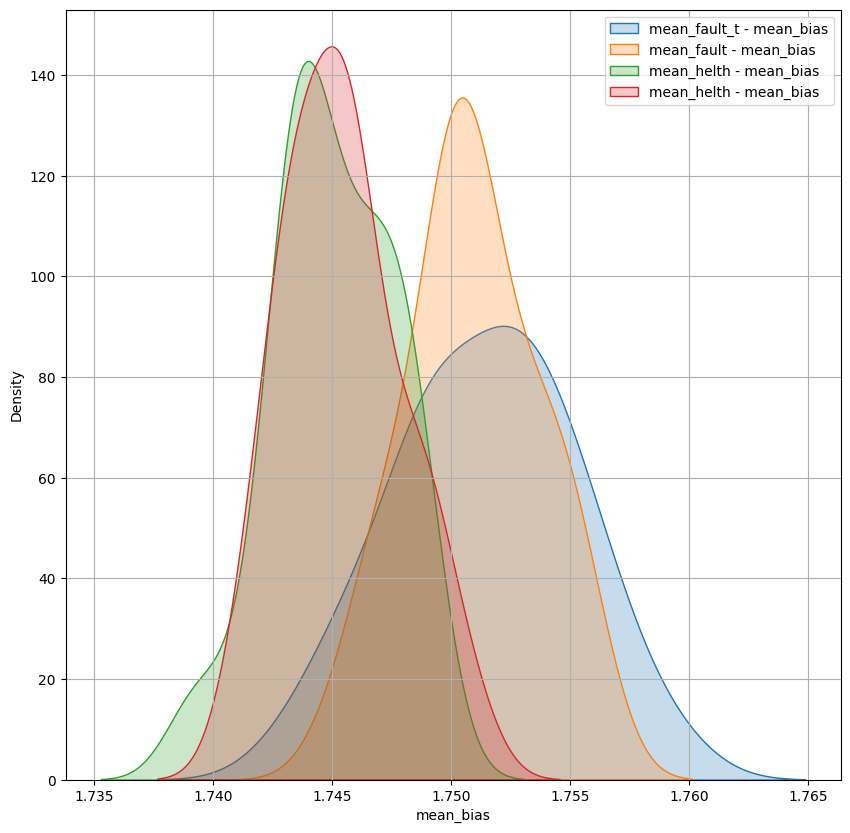

<ipython-input-21-b3cfbe945a72>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-21-b3cfbe945a72>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-21-b3cfbe945a72>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-21-b3cfbe945a72>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( d

mean fault t :  0.0  - mean fault :  0.0  - mean health :  0.0


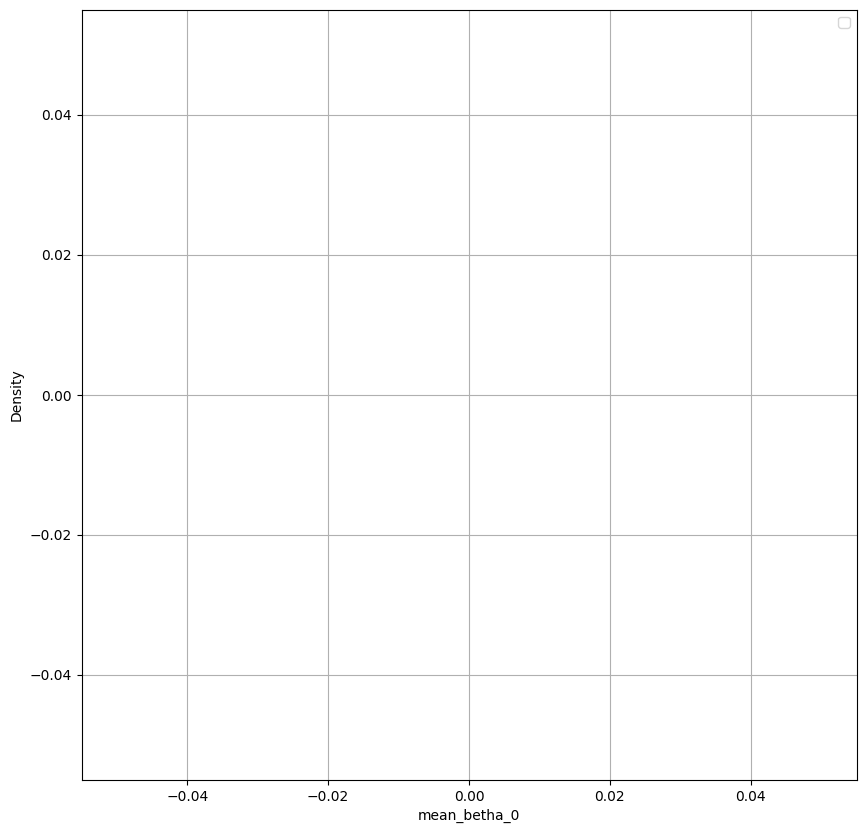

mean fault t :  -1.068666536482962  - mean fault :  -1.0681735513678552  - mean health :  -1.0496727905497747


<ipython-input-21-b3cfbe945a72>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-21-b3cfbe945a72>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-21-b3cfbe945a72>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-21-b3cfbe945a72>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will b

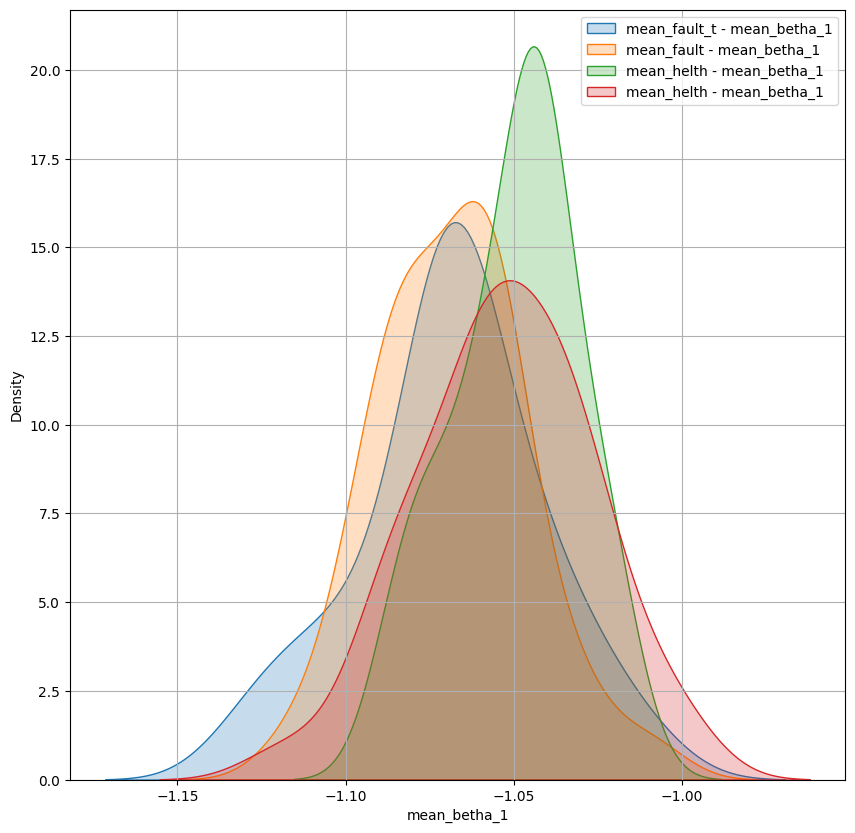

mean fault t :  -0.0740970337688244  - mean fault :  -0.07545096968540027  - mean health :  -0.07711022700147865


<ipython-input-21-b3cfbe945a72>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-21-b3cfbe945a72>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-21-b3cfbe945a72>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-21-b3cfbe945a72>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will b

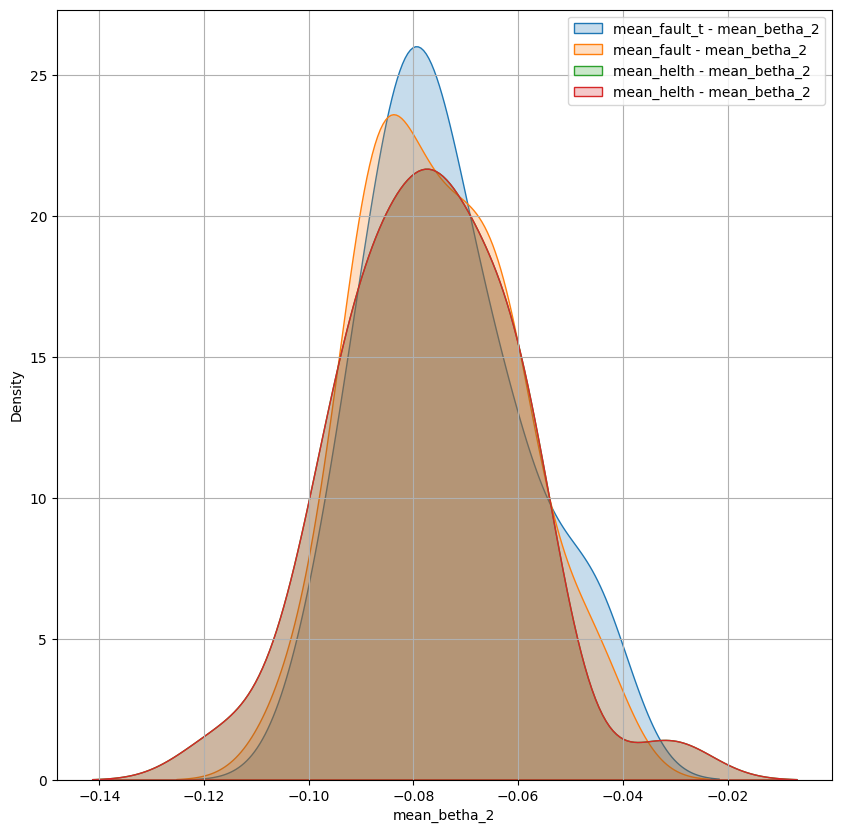

mean fault t :  2.811868213019188  - mean fault :  2.811514345872469  - mean health :  2.786357449680037


<ipython-input-21-b3cfbe945a72>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-21-b3cfbe945a72>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-21-b3cfbe945a72>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-21-b3cfbe945a72>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will b

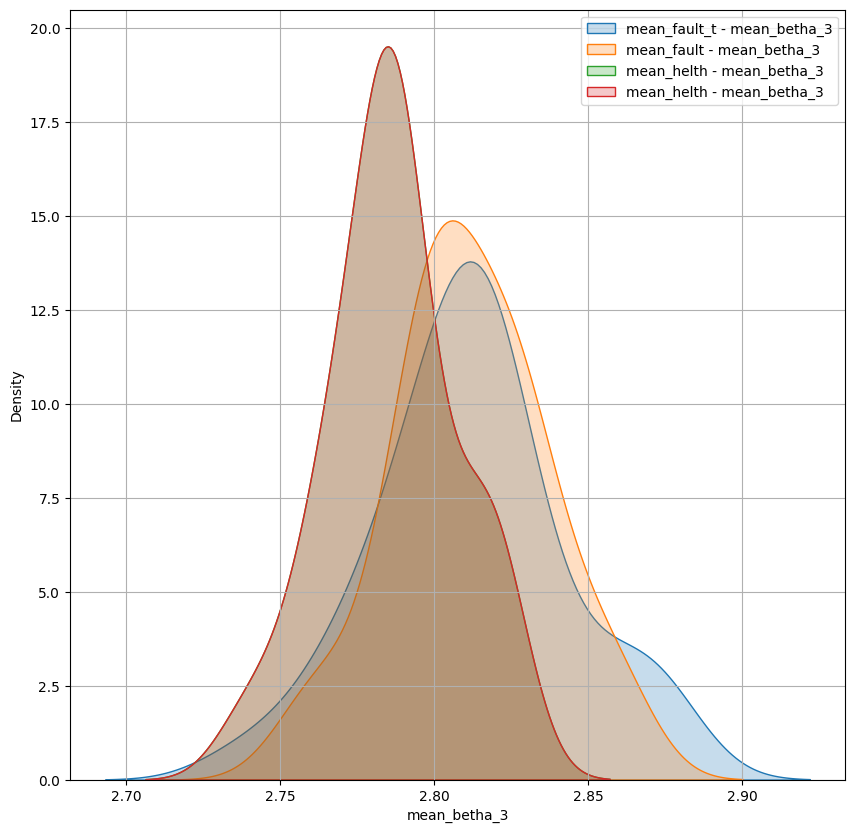

mean fault t :  0.08501631977766574  - mean fault :  0.08712079838406989  - mean health :  0.08969048603645242


<ipython-input-21-b3cfbe945a72>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-21-b3cfbe945a72>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-21-b3cfbe945a72>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-21-b3cfbe945a72>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will b

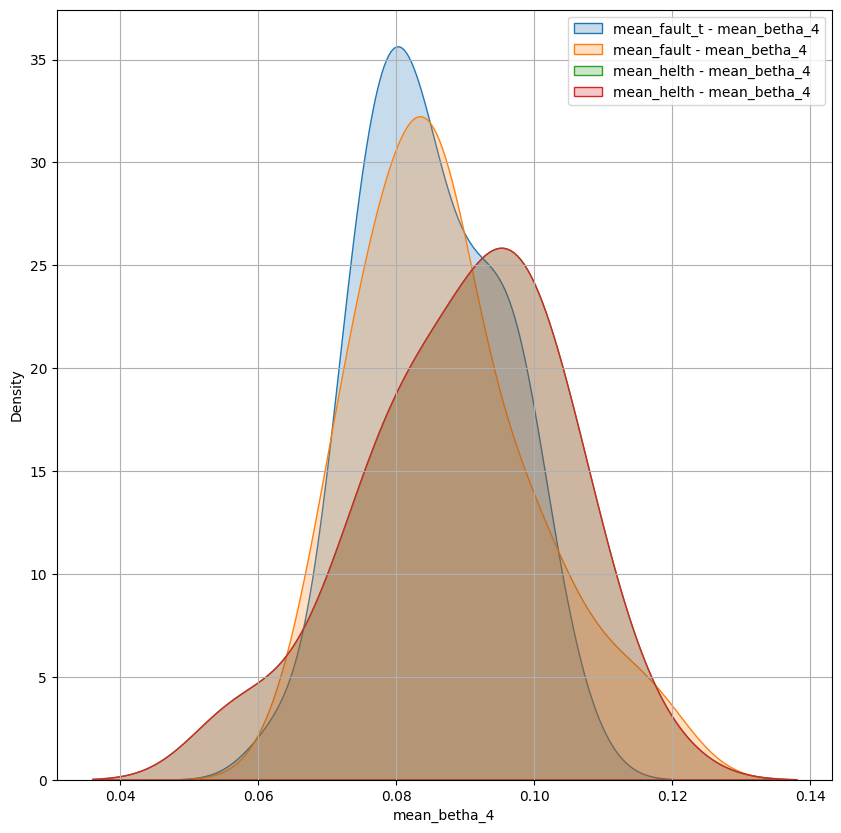

mean fault t :  -0.017903332052016465  - mean fault :  -0.017809262591794533  - mean health :  -0.018349502855484243


<ipython-input-21-b3cfbe945a72>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_t - {element}'  , shade=True )
<ipython-input-21-b3cfbe945a72>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault - {element} '  , shade=True  )
<ipython-input-21-b3cfbe945a72>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-21-b3cfbe945a72>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will b

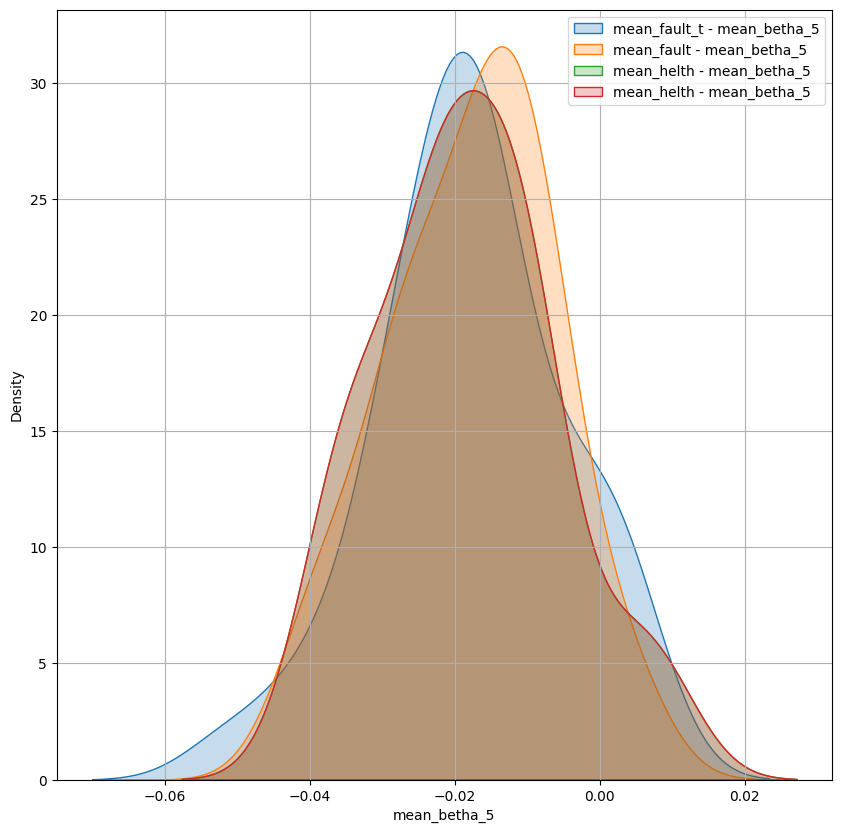

In [21]:
for element in check_columns :
  fig = plt.figure(figsize = (10 , 10 ))
  ax0 = fig.add_subplot(111 )
  print("mean fault t : " , df_fault_t_mean_and_std[element].mean() , " - mean fault : " , df_fault_mean_and_std[element].mean() , " - mean health : " , df_health_mean_and_std[element].mean() )
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_t - {element}'  , shade=True )
  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault - {element} '  , shade=True  )
  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
  sns.kdeplot(df_health_t_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
  plt.legend()
  plt.grid()
  plt.show()

In [13]:
pd.DataFrame(total_simulation)


bias_correlation  betha_0_correlation  betha_1_correlation  \
0          -0.000127                  NaN             0.004468   
1           0.006335                  NaN            -0.035181   
2           0.008704                  NaN            -0.116217   
3           0.009886                  NaN            -0.072435   
4           0.006596                  NaN            -0.004511   
5           0.006858                  NaN            -0.018843   
6           0.003739                  NaN             0.006785   
7           0.008741                  NaN            -0.018425   
8           0.012127                  NaN            -0.030301   
9           0.005527                  NaN            -0.062583   
10         -0.001242                  NaN             0.008359   
11          0.005087                  NaN            -0.086858   
12          0.015920                  NaN            -0.093905   
13          0.014057                  NaN            -0.070900   
14          0.020369                  NaN            -0.124205   
15          0.011241                  NaN             0.009723   

    betha_2_correlation  betha_3_correlation  betha_4_correlation  \
0             -0.090068            -0.001086             0.133267   
1              0.084201             0.012975            -0.034401   
2             -0.067423             0.104296             0.084831   
3             -0.024814             0.089679             0.030567   
4              0.028315            -0.015717            -0.029833   
5              0.054355             0.054980            -0.079375   
6              0.035907            -0.000175            -0.045310   
7             -0.076151             0.045279             0.054104   
8             -0.005576             0.056615            -0.002232   
9              0.075419             0.054879            -0.102702   
10            -0.085513             0.022286             0.090664   
11             0.054021             0.088872            -0.011846   
12            -0.136792             0.111441             0.113331   
13             0.098229             0.077918            -0.010358   
14            -0.034854             0.136969             0.023780   
15             0.065413            -0.017611            -0.070170   

    betha_5_correlation  alpha  flap  accuracy_nav  accuracy_random_forest  \
0             -0.026740  0.001     1      0.551724                0.534483   
1              0.086808  0.001     2      0.465517                0.517241   
2             -0.037840  0.001     3      0.413793                0.431034   
3             -0.031239  0.001     4      0.500000                0.448276   
4              0.017106  0.002     1      0.413793                0.379310   
5              0.018855  0.002     2      0.517241                0.551724   
6              0.015939  0.002     3      0.362069                0.344828   
7             -0.049787  0.002     4      0.465517                0.465517   
8             -0.005825  0.003     1      0.396552                0.379310   
9              0.024424  0.003     2      0.448276                0.534483   
10            -0.051107  0.003     3      0.482759                0.344828   
11             0.063335  0.003     4      0.431034                0.465517   
12            -0.075332  0.004     1      0.482759                0.413793   
13             0.127523  0.004     2      0.500000                0.344828   
14            -0.028081  0.004     3      0.413793                0.431034   
15             0.027729  0.004     4      0.551724                0.413793   

    n_estimators_RF max_features_RF  max_depth_RF criterion_RF  \
0               500            sqrt             4      entropy   
1               200            sqrt             4      entropy   
2               500            sqrt             4         gini   
3               500            sqrt             5         gini   
4               200            sqrt             6 